# Diabietes Health Indicators
## **_Estela STANKOV & Izhaar MOHAMMAD_**

--------

lien du github : https://github.com/IzhaarMO/SPLEX_Project.git

In [4]:
# importation des librairies

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV  # Pour LinearSVC qui n'a pas predict_proba




## GESTION DU DATASET

_____________________

In [5]:
#dataset : diabetes _ binary _ health _ indicators _ BRFSS2015.csv

df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

df.head()


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
df["Diabetes_binary"].value_counts()
# 0 = no diabetes 1 = diabetes

# Here, im just showing the number of observation among the 2 classes and we already se an imbalance between them. With no diabetes (Class 0) being the majoritary class

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

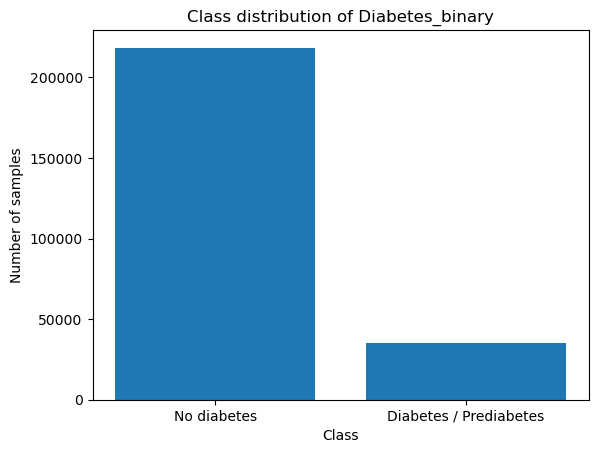

In [7]:
counts = df["Diabetes_binary"].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks([0, 1], ["No diabetes", "Diabetes / Prediabetes"])
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title("Class distribution of Diabetes_binary")
plt.show()

# just a small histogramm to show it visualy

There is a significant imbalance between individuals with diabetes and those without diabetes.

In [8]:
# séparation des variables explicatives et cibles 

X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

# here im just puting the dataframe w/o the classes in the variable y



In [ ]:
# Is gonna BE CHANGED TO HAVE TRAIN VAL AND TEST -> SPLIT THE DATA IN 3 => DONE :))

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.2,           # 20% pour (val + test)
    stratify=y, 
    random_state=42
)

# 2. Split temp en val (10% du total) et test (10% du total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,           # 50% de temp = 10% du total
    stratify=y_temp,
    random_state=42
)

print('=' * 60)
print('DISTRIBUTION DES CLASSES DANS CHAQUE ENSEMBLE')
print('=' * 60)
print(f'\nTotal samples: {len(y):,}')
print(f'  - Classe 0 (No Diabetes): {(y == 0).sum():,} ({(y == 0).mean():.2%})')
print(f'  - Classe 1 (Diabetes):    {(y == 1).sum():,} ({(y == 1).mean():.2%})')
print('=' * 60)

print(f'\nTRAIN SET (80% = {len(y_train):,} samples)')
print(y_train.value_counts(normalize=True).sort_index().to_frame('proportion').assign(
    count=y_train.value_counts().sort_index()
).to_string())
print('=' * 60)

print(f'\nVALIDATION SET (10% = {len(y_val):,} samples)')
print(y_val.value_counts(normalize=True).sort_index().to_frame('proportion').assign(
    count=y_val.value_counts().sort_index()
).to_string())
print('=' * 60)

print(f'\nTEST SET (10% = {len(y_test):,} samples)')
print(y_test.value_counts(normalize=True).sort_index().to_frame('proportion').assign(
    count=y_test.value_counts().sort_index()
).to_string())
print('=' * 60)

# Vérification
print(f'\n✓ Vérification: {len(y_train) + len(y_val) + len(y_test)} = {len(y)} samples')



DISTRIBUTION DES CLASSES DANS CHAQUE ENSEMBLE

Total samples: 253,680
  - Classe 0 (No Diabetes): 218,334 (86.07%)
  - Classe 1 (Diabetes):    35,346 (13.93%)

TRAIN SET (80% = 202,944 samples)
                 proportion   count
Diabetes_binary                    
0.0                0.860666  174667
1.0                0.139334   28277

VALIDATION SET (10% = 25,368 samples)
                 proportion  count
Diabetes_binary                   
0.0                0.860651  21833
1.0                0.139349   3535

TEST SET (10% = 25,368 samples)
                 proportion  count
Diabetes_binary                   
0.0                0.860691  21834
1.0                0.139309   3534

✓ Vérification: 253680 = 253680 samples


## ~ PARTIE 1: Comparaison des modèles supervisés classiques (sans pondération)

___________

L’objectif principal de ce projet n’est pas de maximiser une métrique brute comme l’accuracy ni de démontrer la supériorité d’un modèle complexe, mais de proposer une approche scientifiquement pertinente, cohérente avec la nature des données, et adaptée au contexte de santé publique.
Dans ce cadre, l’enjeu majeur est de détecter correctement les individus diabétiques dans un jeu de données fortement déséquilibré, tout en conservant un modèle compréhensible et stable.

Les données utilisées proviennent d’un questionnaire de santé publique et sont majoritairement constituées de variables binaires ou ordinales. Le déséquilibre entre les classes est important, et l’erreur la plus critique consiste à classer un patient diabétique comme non diabétique. Ainsi, l’optimalité du modèle ne doit pas être évaluée uniquement à partir de l’accuracy, mais principalement à partir du rappel de la classe minoritaire, de la stabilité des performances, et de la capacité d’interprétation.

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, set_name="Test"):
    """Affiche la matrice de confusion"""
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix - {set_name} Set\n{model.__class__.__name__}')
    plt.tight_layout()
    plt.show()
    
    return cm

In [ ]:
def evaluate_model(model, X_test, y_test, set_name="Test", show_cm=True):
    """
    Évalue un modèle DÉJÀ ENTRAÎNÉ sur un ensemble de données
    
    Args:
        model: modèle déjà fit()
        X_test: features de l'ensemble à évaluer
        y_test: labels de l'ensemble à évaluer
        set_name: nom de l'ensemble (pour l'affichage)
    """
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"\n{'='*60}")
    print(f" ÉVALUATION SUR {set_name.upper()}")
    print(f"{'='*60}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    print(f"\n{classification_report(y_test, y_pred)}")

    if show_cm:
        plot_confusion_matrix(model, X_test, y_test, set_name)
    
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

In [ ]:
#def train_and_evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test): # ON VA RE-UTILISER CETTE FONCTION POUR LES DONNER EN TEST APRES SELECTION DES MEILLEURES MODÈLE
def train_and_evaluate_model(model, X_train, X_val, y_train, y_val):
    """
    Entraîne un modèle et l'évalue sur validation et test
    """
    # Entraînement
    print(f"\nEntraînement du modèle {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    

    train_metrics = evaluate_model(model, X_train, y_train, set_name="Train")
    
    # Éval sur VALIDATION
    val_metrics = evaluate_model(model, X_val, y_val, set_name="Validation")
    
    # Éval sur TEST (UNIQUEMENT à la fin ! donc pas maintennat)
    #test_metrics = evaluate_model(model, X_test, y_test, set_name="Test")
    
    # Détection d'overfitting
    train_val_gap = train_metrics['f1'] - val_metrics['f1']
    if train_val_gap > 0.05:
        print(f"\n  OVERFITTING détecté ! Gap Train-Val: {train_val_gap:.4f}")
    else:
        print(f"\n Pas d'overfitting significatif (Gap: {train_val_gap:.4f})")
    
    return {
        'model': model,
        'train_metrics': train_metrics,
        'val_metrics': val_metrics,
        #'test_metrics': test_metrics # sera utlisé plus tard
    }

### Entrainement sur les modèles unbalanced

#### Logistic Regression - Unbalanced


Entraînement du modèle LogisticRegression...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8638
Precision: 0.5386
Recall:    0.1580
F1-Score:  0.2443
ROC-AUC:   0.8229

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174667
         1.0       0.54      0.16      0.24     28277

    accuracy                           0.86    202944
   macro avg       0.71      0.57      0.58    202944
weighted avg       0.83      0.86      0.83    202944



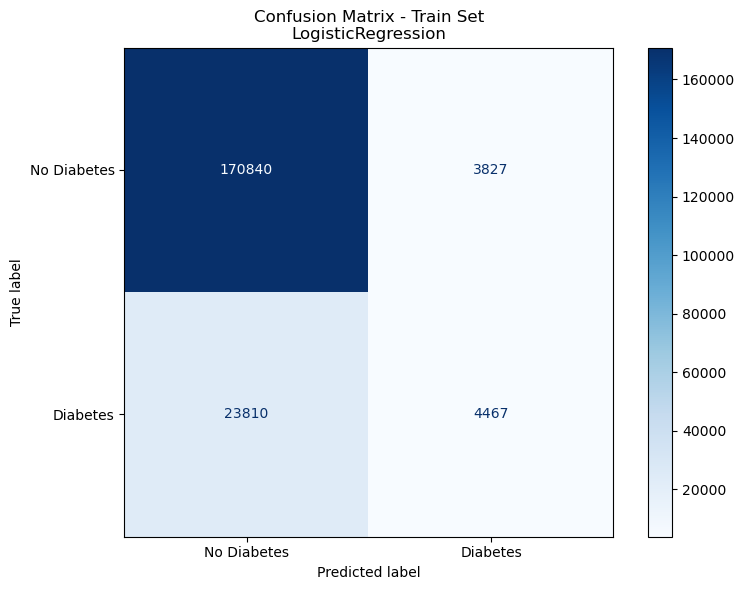


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8621
Precision: 0.5163
Recall:    0.1615
F1-Score:  0.2461
ROC-AUC:   0.8231

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     21833
         1.0       0.52      0.16      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.57      0.59     25368
weighted avg       0.83      0.86      0.83     25368



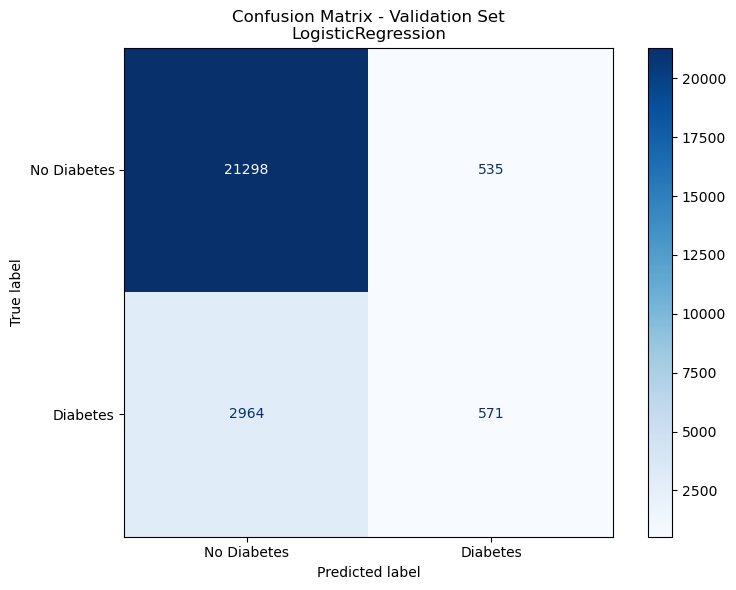


 Pas d'overfitting significatif (Gap: -0.0018)


In [ ]:

results = {}
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
results['LR'] = train_and_evaluate_model(
    #lr_model, X_train, X_val, X_test, y_train, y_val, y_test
    lr_model, X_train, X_val, y_train, y_val
)


#### Decision Tree - Unbalanced


Decision Tree

Entraînement du modèle DecisionTreeClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.9945
Precision: 0.9990
Recall:    0.9612
F1-Score:  0.9797
ROC-AUC:   0.9998

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    174667
         1.0       1.00      0.96      0.98     28277

    accuracy                           0.99    202944
   macro avg       1.00      0.98      0.99    202944
weighted avg       0.99      0.99      0.99    202944



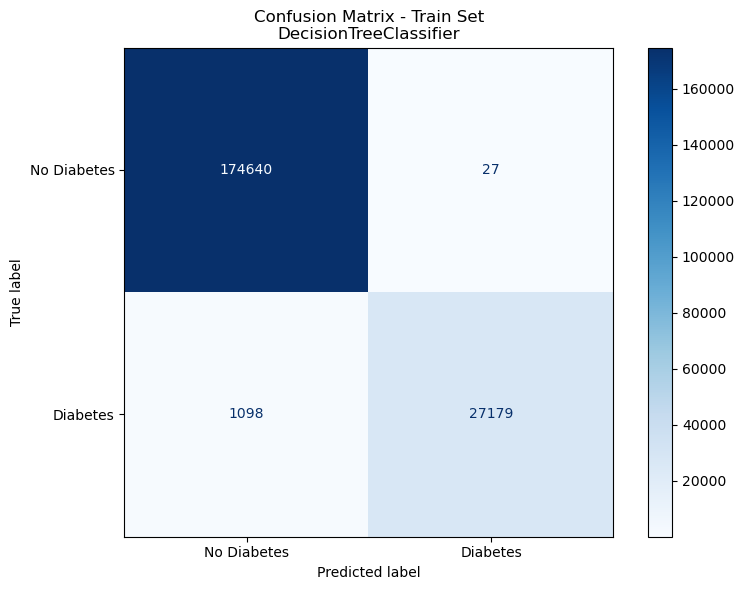


 ÉVALUATION SUR VALIDATION
Accuracy:  0.7971
Precision: 0.2928
Recall:    0.3225
F1-Score:  0.3069
ROC-AUC:   0.5967

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88     21833
         1.0       0.29      0.32      0.31      3535

    accuracy                           0.80     25368
   macro avg       0.59      0.60      0.59     25368
weighted avg       0.81      0.80      0.80     25368



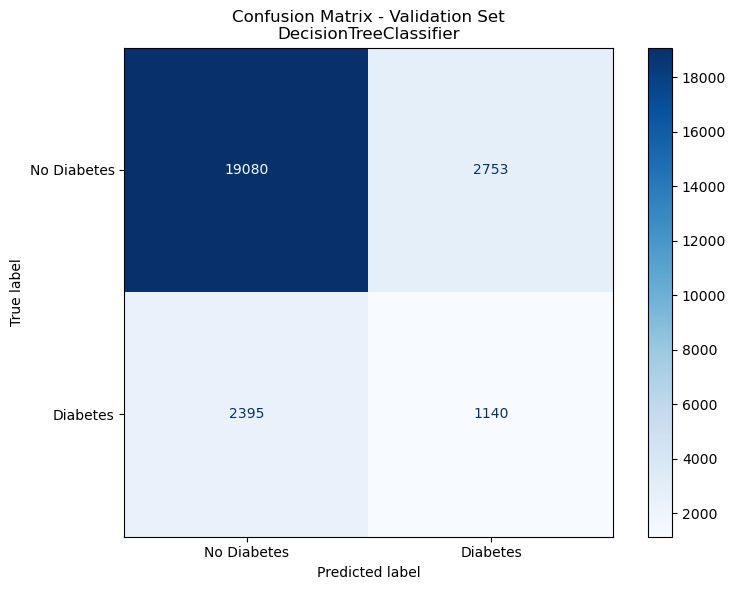


  OVERFITTING détecté ! Gap Train-Val: 0.6728


In [ ]:
print("\n" + "="*50)
print("Decision Tree")
print("="*50)

results = {}
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
results['DT'] = train_and_evaluate_model(
    #dt_model, X_train, X_val, X_test, y_train, y_val, y_test
    dt_model, X_train, X_val, y_train, y_val
    
)



#### Random Forrest - Unbalanced


Random Forrest

Entraînement du modèle RandomForestClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.9944
Precision: 0.9952
Recall:    0.9647
F1-Score:  0.9797
ROC-AUC:   0.9994

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    174667
         1.0       1.00      0.96      0.98     28277

    accuracy                           0.99    202944
   macro avg       0.99      0.98      0.99    202944
weighted avg       0.99      0.99      0.99    202944



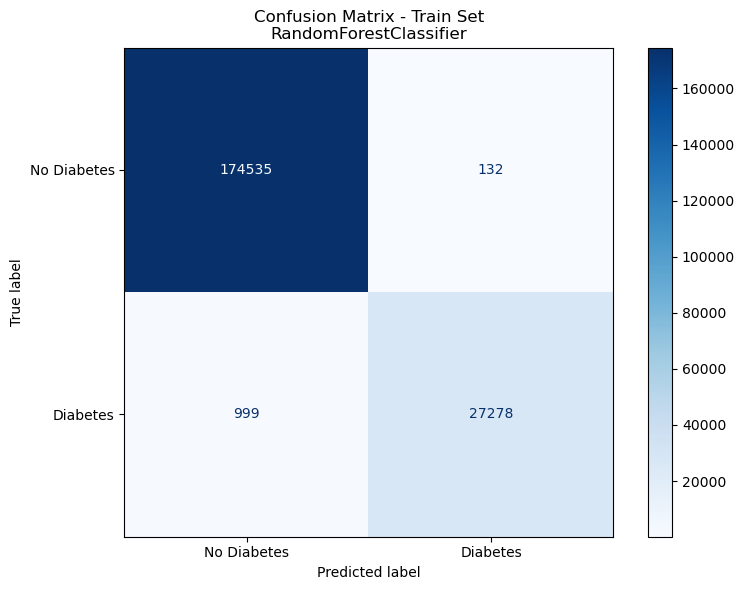


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8608
Precision: 0.5015
Recall:    0.1847
F1-Score:  0.2700
ROC-AUC:   0.7985

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.50      0.18      0.27      3535

    accuracy                           0.86     25368
   macro avg       0.69      0.58      0.60     25368
weighted avg       0.83      0.86      0.83     25368



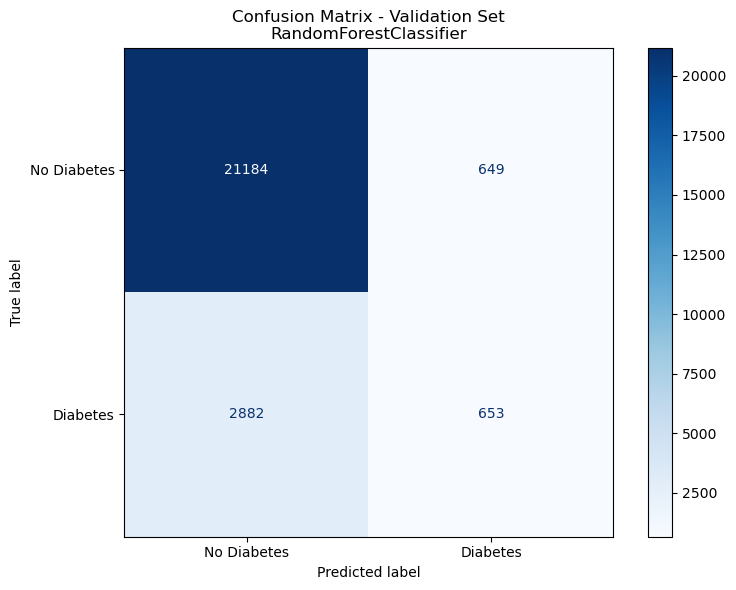


  OVERFITTING détecté ! Gap Train-Val: 0.7097


In [ ]:
print("\n" + "="*50)
print("Random Forrest")
print("="*50)

results = {}
# random forrest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
results['RF'] = train_and_evaluate_model(
    #rf_model, X_train, X_val, X_test, y_train, y_val, y_test
    rf_model, X_train, X_val, y_train, y_val

)

#### Linear SVC - Unbalanced


Linear SVC

Entraînement du modèle CalibratedClassifierCV...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8637
Precision: 0.5356
Recall:    0.1636
F1-Score:  0.2506
ROC-AUC:   0.8233

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174667
         1.0       0.54      0.16      0.25     28277

    accuracy                           0.86    202944
   macro avg       0.71      0.57      0.59    202944
weighted avg       0.83      0.86      0.83    202944



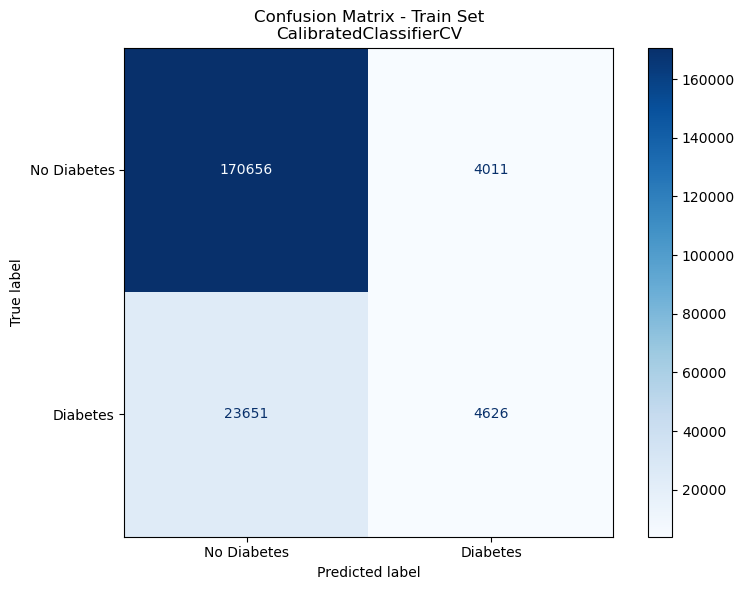


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8620
Precision: 0.5153
Recall:    0.1672
F1-Score:  0.2525
ROC-AUC:   0.8227

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.52      0.17      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.57      0.59     25368
weighted avg       0.83      0.86      0.83     25368



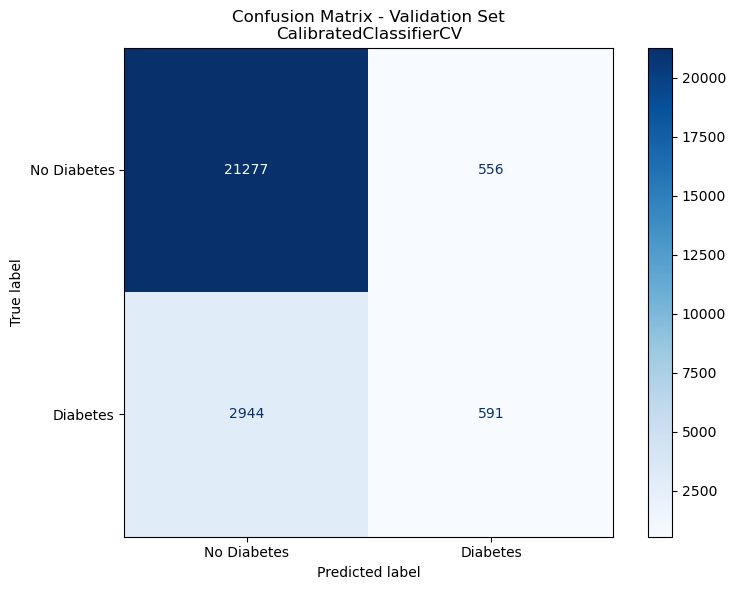


 Pas d'overfitting significatif (Gap: -0.0018)


In [ ]:
print("\n" + "="*50)
print("Linear SVC")
print("="*50)

results = {}
# Linear SVC
svc_model = CalibratedClassifierCV(LinearSVC(random_state=42, max_iter=5000))  # Wrapper pour predict_proba
results['SVC'] = train_and_evaluate_model(
    #svc_model, X_train, X_val, X_test, y_train, y_val, y_test
    svc_model, X_train, X_val, y_train, y_val
    
    )

#### Gradient Boosting - Unbalanced


Gradient Boosting

Entraînement du modèle GradientBoostingClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8673
Precision: 0.5792
Recall:    0.1753
F1-Score:  0.2691
ROC-AUC:   0.8324

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174667
         1.0       0.58      0.18      0.27     28277

    accuracy                           0.87    202944
   macro avg       0.73      0.58      0.60    202944
weighted avg       0.84      0.87      0.84    202944



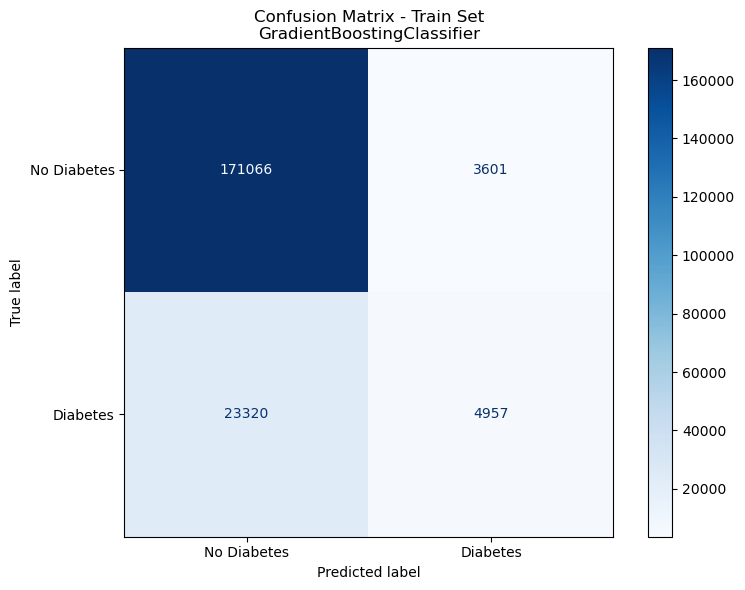


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8653
Precision: 0.5536
Recall:    0.1723
F1-Score:  0.2628
ROC-AUC:   0.8314

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     21833
         1.0       0.55      0.17      0.26      3535

    accuracy                           0.87     25368
   macro avg       0.72      0.57      0.59     25368
weighted avg       0.83      0.87      0.83     25368



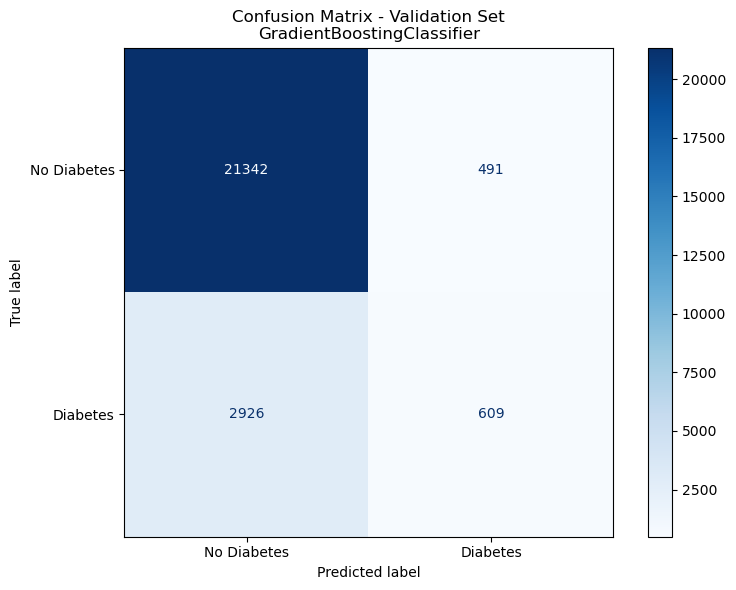


 Pas d'overfitting significatif (Gap: 0.0064)


In [ ]:
print("\n" + "="*50)
print("Gradient Boosting")
print("="*50)

results = {}
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100)
results['GB'] = train_and_evaluate_model(
    #gb_model, X_train, X_val, X_test, y_train, y_val, y_test
    gb_model, X_train, X_val, y_train, y_val
    
    )

#### AdaBoost - Unbalanced


AdaBoost

Entraînement du modèle AdaBoostClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8648
Precision: 0.5409
Recall:    0.1963
F1-Score:  0.2881
ROC-AUC:   0.8257

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93    174667
         1.0       0.54      0.20      0.29     28277

    accuracy                           0.86    202944
   macro avg       0.71      0.58      0.61    202944
weighted avg       0.83      0.86      0.84    202944



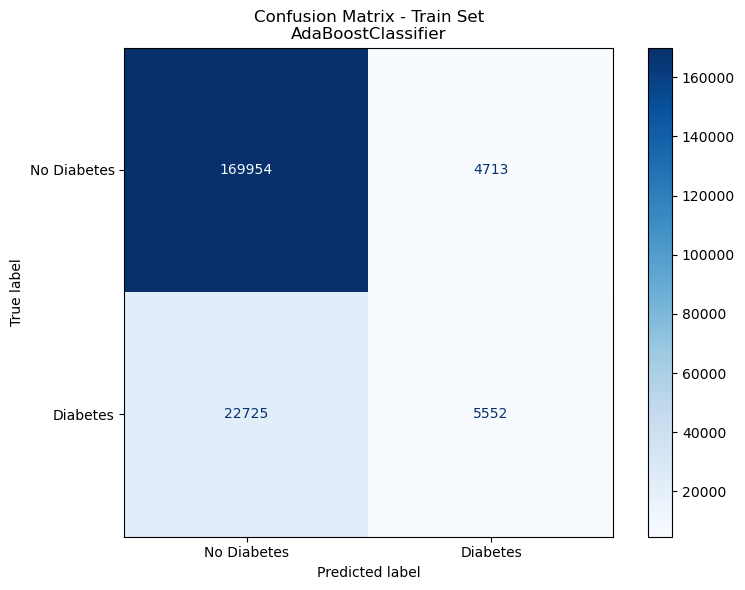


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8636
Precision: 0.5279
Recall:    0.1980
F1-Score:  0.2880
ROC-AUC:   0.8258

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.53      0.20      0.29      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.58      0.61     25368
weighted avg       0.83      0.86      0.84     25368



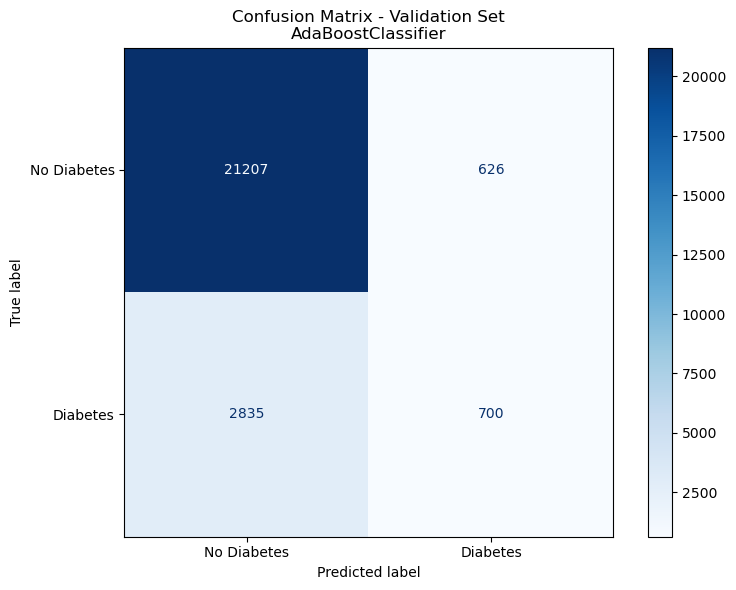


 Pas d'overfitting significatif (Gap: 0.0001)


In [ ]:
print("\n" + "="*50)
print("AdaBoost")
print("="*50)

results = {}
# ada boost
ab_model = AdaBoostClassifier(random_state=42, n_estimators=100)
results['AB'] = train_and_evaluate_model(
    #ab_model, X_train, X_val, X_test, y_train, y_val, y_test
    ab_model, X_train, X_val, y_train, y_val
    
    )

#### XGBoost - Unbalanced


XGBoost

Entraînement du modèle XGBClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.8765
Precision: 0.6810
Recall:    0.2140
F1-Score:  0.3256
ROC-AUC:   0.8569

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93    174667
         1.0       0.68      0.21      0.33     28277

    accuracy                           0.88    202944
   macro avg       0.78      0.60      0.63    202944
weighted avg       0.86      0.88      0.85    202944



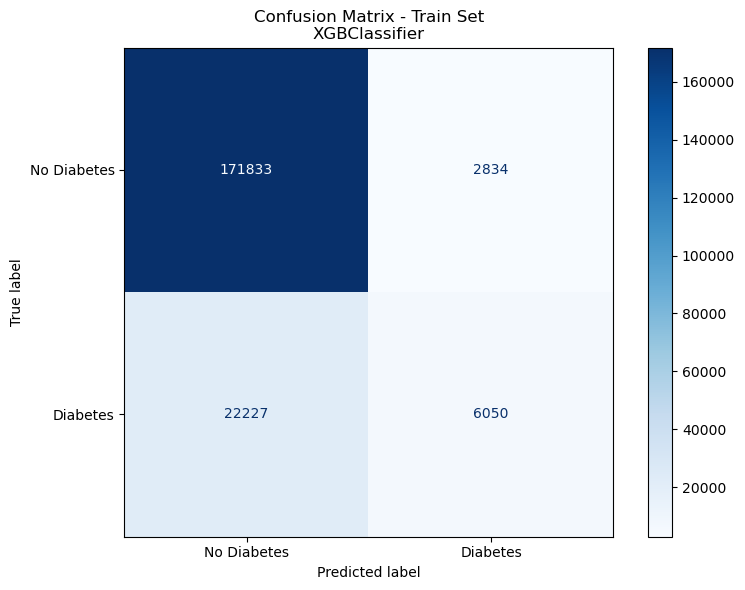


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8630
Precision: 0.5263
Recall:    0.1672
F1-Score:  0.2538
ROC-AUC:   0.8286

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     21833
         1.0       0.53      0.17      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.70      0.57      0.59     25368
weighted avg       0.83      0.86      0.83     25368



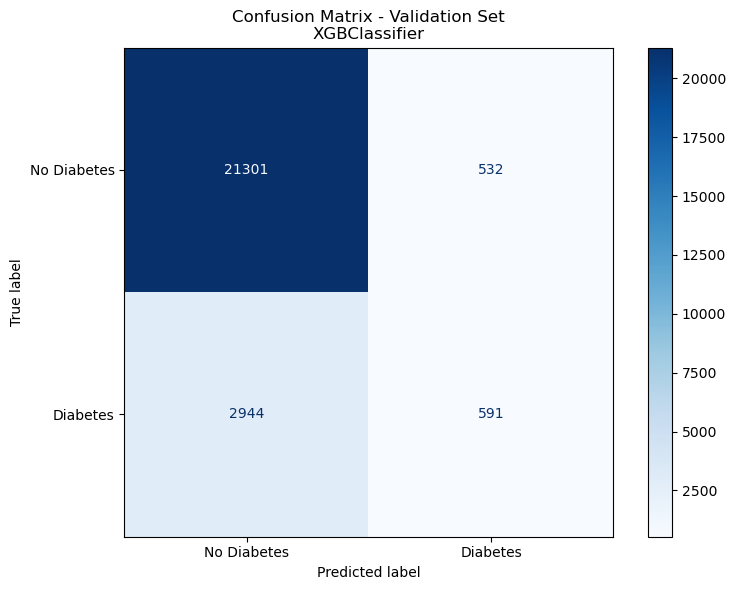


  OVERFITTING détecté ! Gap Train-Val: 0.0719


In [ ]:
print("\n" + "="*50)
print("XGBoost")
print("="*50)

results = {}
# XGBoost
xgb_model =  XGBClassifier(random_state=42, n_estimators=100, eval_metric='logloss')
results['XGB'] = train_and_evaluate_model(
    #xgb_model, X_train, X_val, X_test, y_train, y_val, y_test
    xgb_model, X_train, X_val, y_train, y_val
    
    )

### Tableau récapitulatif des résultats – Évaluation sur l’ensemble de validation

| Modèle                   | Accuracy   | Precision (classe 1) | Recall (classe 1) | F1-score (classe 1) | ROC-AUC    |
| ------------------------ | ---------- | -------------------- | ----------------- | ------------------- | ---------- |
| Logistic Regression (LR) | 0.8620     | 0.5150               | 0.1601            | 0.2443              | 0.8231     |
| Random Forest (RF)       | 0.8608     | 0.5015               | 0.1847            | 0.2700              | 0.7985     |
| Decision Tree (DT)       | 0.7971     | 0.2928               | 0.3225            | 0.3069              | 0.5967     |
| Linear SVC               | 0.8620     | 0.5153               | 0.1672            | 0.2525              | 0.8227     |
| Gradient Boosting        | **0.8653** | **0.5536**           | 0.1723            | 0.2628              | **0.8314** |
| AdaBoost                 | 0.8636     | 0.5279               | **0.1980**        | **0.2880**          | 0.8258     |
| XGBoost                  | 0.8630     | 0.5263               | 0.1672            | 0.2538              | 0.8286     |


Bien que la majorité des modèles obtiennent une accuracy élevée, le rappel de la classe diabétique (classe 1) reste faible, mettant en évidence l’impact du déséquilibre des classes et la nécessité de stratégies adaptées pour améliorer la détection des cas positifs.

Afin d’analyser l’impact du déséquilibre des classes, nous avons sélectionné deux modèles représentatifs : une **régression logistique**, modèle linéaire simple et interprétable servant de référence, et un **random forrest**, modèle non linéaire plus puissant. Ce choix permet d’étudier si la pondération des classes améliore la détection des individus diabétiques de manière cohérente, indépendamment de la complexité du modèle.

Nous avons choisi de ne pas sélectinné les modèles Gradient Boosting et XGBoost car même si ils sont trés performant en naïfs, ces modèles intègrent déjà une forme de focalisation sur les erreurs, rendant l’impact explicite de la pondération moins visible.


## ~ PARTIE 2:  Pondération des classes & Analyse de l’impact du déséquilibre

Pourquoi on fait class_weight="balanced" ?
Le problème de fond de notre dataset = le déséquilibre

Dans notre dataset :

beaucoup de non diabétiques

peu de diabétiques

Un modèle naïf apprend : “Si je prédis toujours non diabétique, je suis souvent correct.”

ici, class_weight = "balanced", punit plus fortement les erreurs sur la classe minoritaire (diabétique)

Conséquence, le modèle fait plus attention aux diabétiques, le recall augmente, l’accuracy peut baisser

**CCL: La pondération des classes permet de corriger le biais induit par le déséquilibre.**


Analyse du déséquilibre (à dire avant)

Étudier l’impact du déséquilibre des classes sur les performances des modèles supervisés, en particulier sur la détection des individus diabétiques. Ici, on ne cherche pas le meilleur modèle. On fixe simplement les modèles et on change uniquement la gestion du déséquilibre.


-----------------

In [ ]:
#class_weight="balanced"
# "When class_weights=’balanced’, the model automatically assigns the class weights inversely proportional to their respective frequencies."
# https://tracyrenee61.medium.com/how-i-used-class-weights-balanced-to-solve-a-class-imbalance-problem-in-python-cceaecd4c659

In [ ]:
def train_and_evaluate_model(model, X_train, X_val, X_test, y_train, y_val, y_test): # ON VA RE-UTILISER CETTE FONCTION POUR LES DONNER EN TEST APRES SELECTION DES MEILLEURES MODÈLE
#def train_and_evaluate_model(model, X_train, X_val, y_train, y_val): # on réutilise la fonction précédetnte

    # Entraînement
    print(f"\nEntraînement du modèle {model.__class__.__name__}...")
    model.fit(X_train, y_train)
    
    # Éval sur TRAIN (pour détecter l'overfitting)
    train_metrics = evaluate_model(model, X_train, y_train, set_name="Train")
    
    # Éval sur VALIDATION
    val_metrics = evaluate_model(model, X_val, y_val, set_name="Validation")
    
    # Éval sur TEST (UNIQUEMENT à la fin une fois avoir choisi les modèles !)
    test_metrics = evaluate_model(model, X_test, y_test, set_name="Test")
    
    # Détection d'overfitting
    train_val_gap = train_metrics['f1'] - val_metrics['f1']
    if train_val_gap > 0.05:
        print(f"\n  OVERFITTING détecté ! Gap Train-Val: {train_val_gap:.4f}")
    else:
        print(f"\n Pas d'overfitting significatif (Gap: {train_val_gap:.4f})")
    
    return {
        'model': model,
        'train_metrics': train_metrics,
        'val_metrics': val_metrics,
        'test_metrics': test_metrics
    }

#### Logistic Regression - Balanced


 Logistic Regression - Balanced

Entraînement du modèle LogisticRegression...

 ÉVALUATION SUR TRAIN
Accuracy:  0.7320
Precision: 0.3120
Recall:    0.7659
F1-Score:  0.4433
ROC-AUC:   0.8235

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82    174667
         1.0       0.31      0.77      0.44     28277

    accuracy                           0.73    202944
   macro avg       0.63      0.75      0.63    202944
weighted avg       0.86      0.73      0.77    202944



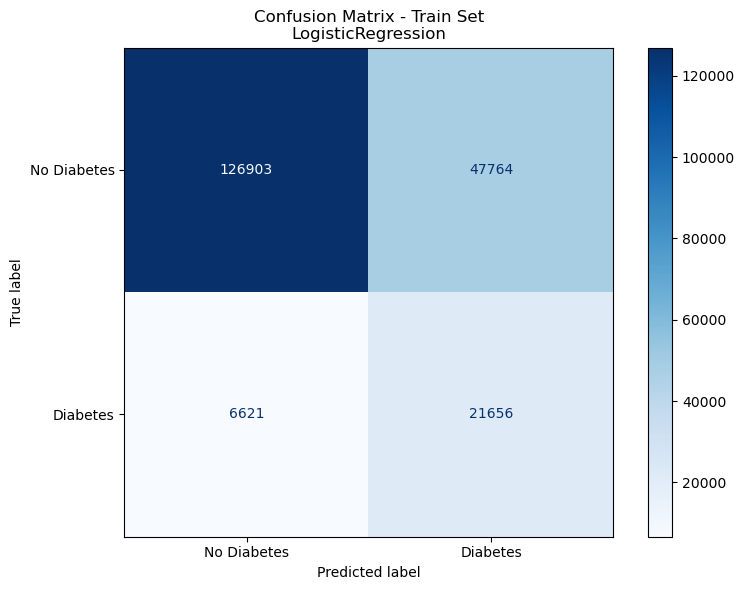


 ÉVALUATION SUR VALIDATION
Accuracy:  0.7345
Precision: 0.3151
Recall:    0.7714
F1-Score:  0.4475
ROC-AUC:   0.8237

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.83     21833
         1.0       0.32      0.77      0.45      3535

    accuracy                           0.73     25368
   macro avg       0.63      0.75      0.64     25368
weighted avg       0.86      0.73      0.77     25368



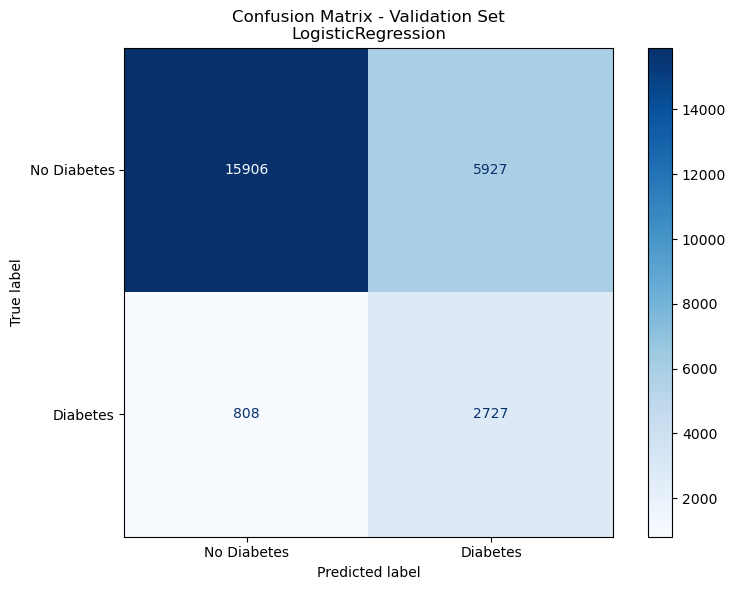


 ÉVALUATION SUR TEST
Accuracy:  0.7286
Precision: 0.3064
Recall:    0.7507
F1-Score:  0.4352
ROC-AUC:   0.8155

              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     21834
         1.0       0.31      0.75      0.44      3534

    accuracy                           0.73     25368
   macro avg       0.63      0.74      0.63     25368
weighted avg       0.86      0.73      0.77     25368



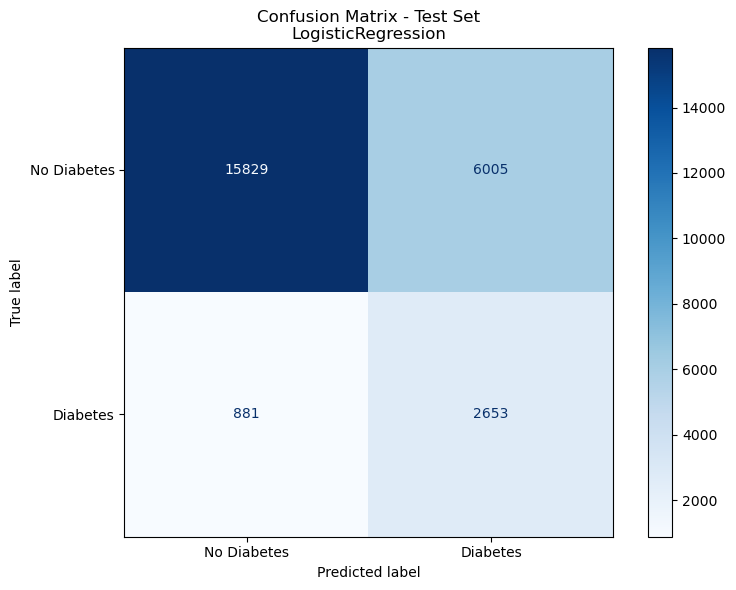


 Pas d'overfitting significatif (Gap: -0.0041)


In [ ]:
print("\n" + "="*50)
print(" Logistic Regression - Balanced")
print("="*50)

results = {}
# Logistic Regression - Balenced
lr_model_balanced = lr_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
results['LR_Balanced'] = train_and_evaluate_model(
    lr_model_balanced, X_train, X_val, X_test, y_train, y_val, y_test
    #lr_model, X_train, X_val, y_train, y_val # ce qu'on avait fait avant quand les modèles étaient unbalanced
)



#### Random Forrest - Balanced


Random Forrest - Balanced

Entraînement du modèle RandomForestClassifier...

 ÉVALUATION SUR TRAIN
Accuracy:  0.9934
Precision: 0.9624
Recall:    0.9914
F1-Score:  0.9767
ROC-AUC:   0.9993

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    174667
         1.0       0.96      0.99      0.98     28277

    accuracy                           0.99    202944
   macro avg       0.98      0.99      0.99    202944
weighted avg       0.99      0.99      0.99    202944



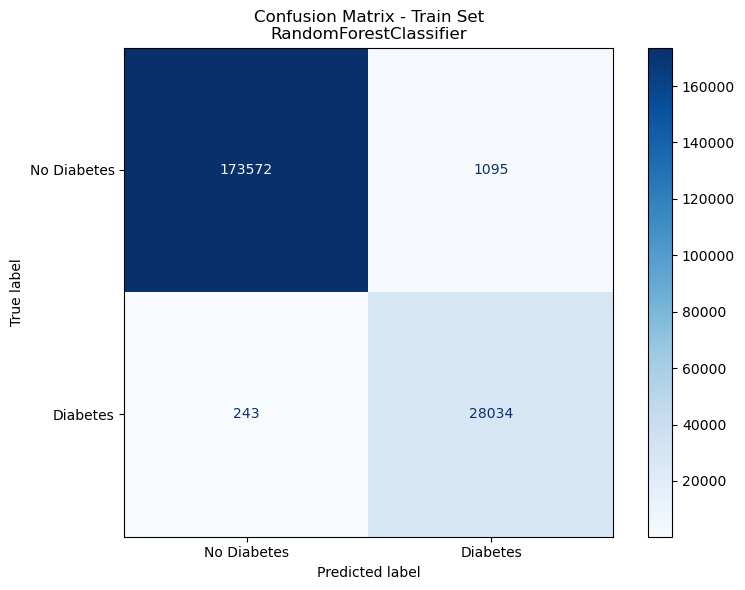


 ÉVALUATION SUR VALIDATION
Accuracy:  0.8586
Precision: 0.4793
Recall:    0.1669
F1-Score:  0.2476
ROC-AUC:   0.7942

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21833
         1.0       0.48      0.17      0.25      3535

    accuracy                           0.86     25368
   macro avg       0.68      0.57      0.58     25368
weighted avg       0.82      0.86      0.83     25368



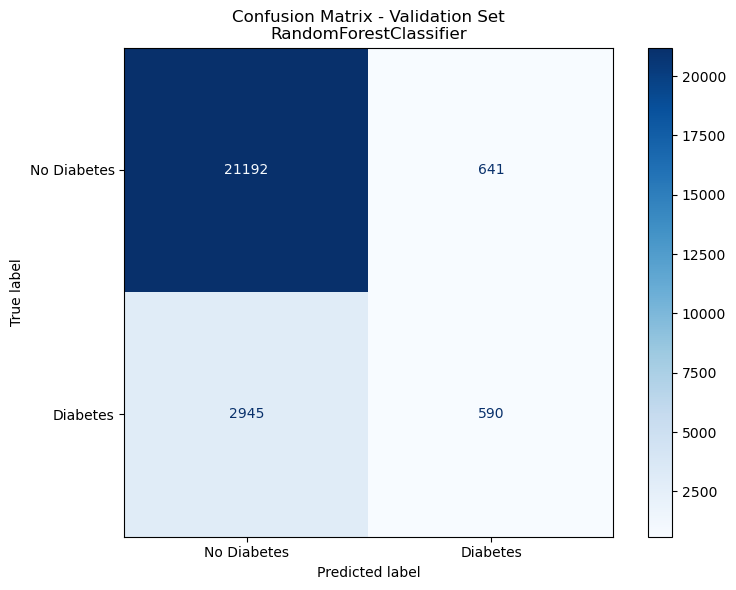


 ÉVALUATION SUR TEST
Accuracy:  0.8554
Precision: 0.4447
Recall:    0.1525
F1-Score:  0.2271
ROC-AUC:   0.7885

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     21834
         1.0       0.44      0.15      0.23      3534

    accuracy                           0.86     25368
   macro avg       0.66      0.56      0.57     25368
weighted avg       0.82      0.86      0.82     25368



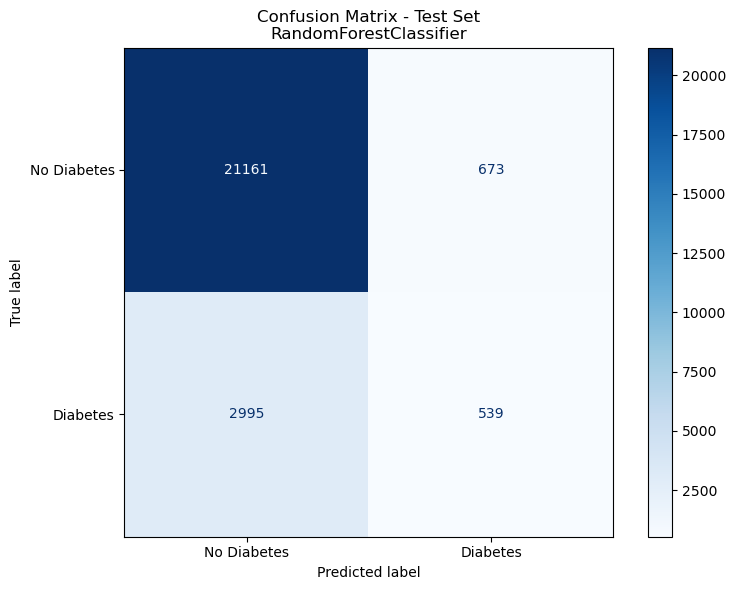


  OVERFITTING détecté ! Gap Train-Val: 0.7291


In [ ]:
print("\n" + "="*50)
print("Random Forrest - Balanced")
print("="*50)

results = {}
# random forrest - Balanced
rf_model_balanced = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
results['RF_Balanced'] = train_and_evaluate_model(
    rf_model_balanced, X_train, X_val, X_test, y_train, y_val, y_test
    #rf_model, X_train, X_val, y_train, y_val

)

### Tableau récapitulatif — Évaluation sur VALIDATION uniquement
#### Classe positive = diabète (1)

| Modèle              | Pondération  | Accuracy   | Precision (1) | Recall (1) | F1-score (1) | ROC-AUC |
| ------------------- | ------------ | ---------- | ------------- | ---------- | ------------ | ------- |
| Logistic Regression | Unbalanced   | 0.8621     | 0.5163        | 0.1615     | 0.2461       | 0.8231  |
| Logistic Regression | **Balanced** | **0.7345** | 0.3151        | **0.7714** | **0.4475**   | 0.8237  |
| Random Forest       | Unbalanced   | 0.8608     | 0.5015        | 0.1847     | 0.2700       | 0.7985  |
| Random Forest       | Balanced     | 0.8586     | 0.4793        | 0.1669     | 0.2476       | 0.7942  |


Tout d'abords, pour les modèles de type Logistic Regression, il y a un effet clair, net et massif de la pondération.

Pour le LR non pondéré, on obtient une accuracy élevée (~0.86) et un recall pour la classe 1 (=diabète) très faible (~0.16). Ce qui nous indique que le modèle privilégie massivement la classe majoritaire. C'est le comportement typique attendue pour un modèle biaisé par le déséquilibre. 

Pour le LR pondéré (class_weight="balanced"). On a un recall plus intéresant pour la classe 1 (=diabète) : 0.16 → 0.77 (×5 !). Avec un F1-score : 0.25 → 0.45
Cependant l'Accuracy diminue (logique etant donné qu'avant l'accuracy etait influencé par la classe majoritaire). Et la ROC-AUC ≈ inchangé. Dans ce modèle la pondération ne change pas la capacité de séparation globale (ROC-AUC), mais modifie profondément le compromis précision–rappel. C’est exactement l’effet théorique que nous attendiosn, et c’est pour ça que la Linéar Règression est un modèle de démonstration parfait.

Pour les modèles de type Random Forrest, l'eefet de la pondération est beaucoup plus subtil malgré la forte capacité de ces modèles.

On observe pour le RF non pondéré un overfitting massif (train ≈ 1, validation ≈ 0.86)pour un recall de la classe diabète (= classe 1) faible (~0.18). Même si on obtient une bonne accuracy pour ce modèle, nous avons une mauvaise détection des cas positifs du diabtes. Ce qui nous permet de comprendre que même un modèle très puissant reste biaisé par le déséquilibre de classe. 

Dans le cas du RF pondéré, il y n'a aucune amélioration du Recall de la classe 1 (=diabète). On observe une légère baisse de toutes les autres métriques (en comparaison avec le modèle du RF unbalanced), un overfitting qui est toujours présent et la ROC-AUC diminue légèrement. Das ce genre de moèle la pondération des classes n’est pas toujours suffisante pour corriger le biais dans des modèles très flexibles comme le random forrest.

## Modèle retenu : Régression logistique avec pondération des classes

Au regard de nos critères, la régression logistique avec class_weight = "balanced" apparaît comme le modèle le plus adapté à notre problème.

Tout d’abord, ce modèle permet de traiter efficacement le déséquilibre des classes. Les résultats montrent une augmentation très nette du rappel de la classe diabétique, qui passe d’environ 0,16 sans pondération à environ 0,77 avec pondération, accompagnée d’une amélioration significative du F1-score. Cette évolution indique que le modèle parvient à corriger le biais initial consistant à privilégier excessivement la classe majoritaire, sans dégrader fortement sa capacité globale de discrimination, comme le montre la stabilité du ROC-AUC.

Ensuite, le comportement de la régression logistique est contrôlable et prévisible. La pondération des classes agit directement sur la fonction de coût du modèle, ce qui permet d’expliquer clairement pourquoi les prédictions changent : les erreurs sur la classe diabétique sont davantage pénalisées lors de l’apprentissage. Contrairement à des modèles plus complexes, il n’existe pas de mécanismes internes opaques rendant l’interprétation difficile.

Par ailleurs, la régression logistique présente une excellente capacité de généralisation. Les performances observées sur les ensembles d’entraînement, de validation et de test sont très proches, ce qui indique l’absence d’overfitting significatif. Cette stabilité est un critère essentiel en santé publique, où l’on cherche des modèles robustes et fiables plutôt que des performances artificiellement élevées sur les données d’apprentissage.

Un autre avantage majeur de ce modèle est son interprétabilité. Les coefficients de la régression logistique peuvent être analysés pour identifier les variables associées à une augmentation ou une diminution du risque de diabète. Cette propriété permet de produire un discours scientifique et médical clair, centré sur les facteurs de risque, ce qui est difficilement réalisable avec des modèles de type forêts aléatoires ou boosting.

Enfin, la régression logistique est parfaitement alignée avec la structure des données. Les relations attendues entre les variables et la probabilité de diabète sont plausiblement monotones et additives, ce qui correspond précisément aux hypothèses sous-jacentes du modèle.

## ~ PARTIE 3: Sélection de Variables

___________

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score, recall_score, balanced_accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif



In [ ]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
X = df.drop(columns=["Diabetes_binary"])
y = df["Diabetes_binary"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

scoring = {
    "f1": make_scorer(f1_score),
    "recall": make_scorer(recall_score),
    "bal_acc": make_scorer(balanced_accuracy_score)
}

def mean_cv_scores(pipe):
    res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    return {k: float(np.mean(v)) for k, v in res.items() if k.startswith("test_")}


-----
## **1. Baseline (w/o sélection)**

In [ ]:
baseline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=3000,
        class_weight="balanced",
        solver="lbfgs"  # L2 standard
    ))
])

print(mean_cv_scores(baseline))


{'test_f1': 0.44303568607676186, 'test_recall': 0.7653568895259889, 'test_bal_acc': 0.7459010247806415}


----
## **2. Filter : Mutual Information + top-k**

### **Quel nb de features ?**

In [ ]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

scoring = {
    "f1": make_scorer(f1_score),
    "recall": make_scorer(recall_score),
    "bal_acc": make_scorer(balanced_accuracy_score)
}

def eval_pipe(pipe, X_train, y_train):
    res = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    return {
        "f1": np.mean(res["test_f1"]),
        "recall": np.mean(res["test_recall"]),
        "bal_acc": np.mean(res["test_bal_acc"])
    }

#fonction MI
def mi_score(X, y):
    return mutual_info_classif(X, y, random_state=42)

ks = [3, 5, 8, 10, 15, 21]
rows = []

for k in ks:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("select", SelectKBest(score_func=mi_score, k=k)),
        ("clf", LogisticRegression(
            max_iter=3000, class_weight="balanced", solver="lbfgs"
        ))
    ])
    s = eval_pipe(pipe, X_train, y_train)
    rows.append({"method": "MI", "k": k, **s})

mi_results = pd.DataFrame(rows)
print(mi_results)


  method   k        f1    recall   bal_acc
0     MI   3  0.409266  0.744280  0.718925
1     MI   5  0.427499  0.741274  0.730871
2     MI   8  0.439743  0.762280  0.743155
3     MI  10  0.440073  0.761502  0.743198
4     MI  15  0.441393  0.763270  0.744411
5     MI  21  0.443036  0.765357  0.745901


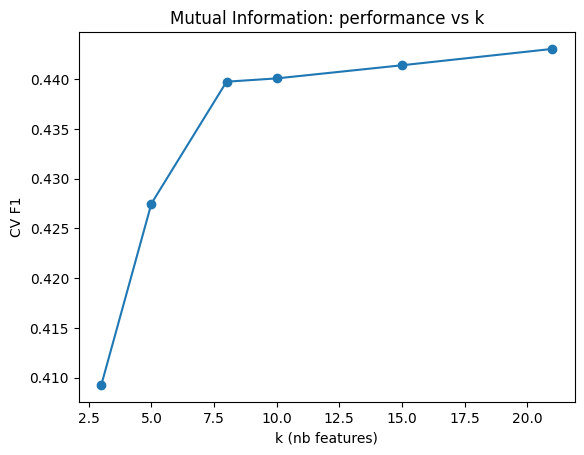

In [ ]:
plt.figure()
plt.plot(mi_results["k"], mi_results["f1"], marker="o")
plt.xlabel("k (nb features)")
plt.ylabel("CV F1")
plt.title("Mutual Information: performance vs k")
plt.show()


La sélection par Mutual Information montre un coude autour de k=8 : le score F1 passe de 0.427 (k=5) à 0.440 (k=8), puis les gains deviennent marginaux (0.440 à k=10, 0.441 à k=15, 0.443 à k=21). Nous retenons k=8 car il conserve des performances très proches du baseline (ΔF1 ≈ −0.003) tout en réduisant fortement le nombre de variables, ce qui améliore l’interprétabilité et la simplicité du modèle.

In [ ]:
#extraire les features sélectionnées pour k choisi
best_k = 8
pipe_best = Pipeline([
    ("scaler", StandardScaler()),
    ("select", SelectKBest(score_func=mi_score, k=best_k)),
    ("clf", LogisticRegression(max_iter=3000, class_weight="balanced", solver="lbfgs"))
])
pipe_best.fit(X_train, y_train)

mask = pipe_best.named_steps["select"].get_support()
selected_features_mi = X_train.columns[mask].tolist()
print(selected_features_mi)


['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'DiffWalk', 'Age']


Features => **['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'DiffWalk', 'Age']**

C’est très cohérent : ce sont des facteurs classiquement liés au diabète / risque cardiométabolique (âge, IMC, HTA, cholestérol, activité physique, état de santé général, mobilité, antécédents cardio)

#### **Classement features**

In [ ]:
#1 run
# X_train, y_train -> ceux du split stratifié
#définis quelles colonnes sont plutôt continues
continuous_cols = ["BMI", "PhysHlth", "MentHlth"]

#mask True = feature discrète, False = continue
discrete_mask = np.array([c not in continuous_cols for c in X_train.columns])

mi = mutual_info_classif(
    X_train, y_train,
    discrete_features=discrete_mask,
    random_state=42
)

mi_scores = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)

print("\nAll features ranked:")
print(mi_scores)



All features ranked:
GenHlth                 0.044059
HighBP                  0.035085
BMI                     0.030072
Age                     0.020319
DiffWalk                0.020194
HighChol                0.020015
PhysHlth                0.013727
Income                  0.013560
HeartDiseaseorAttack    0.012605
Education               0.007484
PhysActivity            0.006434
Stroke                  0.004456
MentHlth                0.003243
CholCheck               0.003051
HvyAlcoholConsump       0.001992
Smoker                  0.001871
Veggies                 0.001438
Fruits                  0.000930
NoDocbcCost             0.000493
Sex                     0.000477
AnyHealthcare           0.000133
dtype: float64


In [ ]:
#stabiliser MI en moyennant plusieurs runs. MI peut légèrement varier selon l’estimation
runs = 15
all_mi = []

for seed in range(42, 42 + runs):
    mi = mutual_info_classif(
        X_train, y_train,
        discrete_features=discrete_mask,
        random_state=seed
    )
    all_mi.append(mi)

all_mi = np.array(all_mi)
mi_mean = all_mi.mean(axis=0)
mi_std  = all_mi.std(axis=0)

mi_df = pd.DataFrame(
    {"MI_mean": mi_mean, "MI_std": mi_std},
    index=X_train.columns
).sort_values("MI_mean", ascending=False)

print(mi_df.head(10))


                       MI_mean        MI_std
GenHlth               0.044059  6.938894e-18
HighBP                0.035085  6.938894e-18
BMI                   0.029550  7.505386e-04
Age                   0.020319  0.000000e+00
DiffWalk              0.020194  6.938894e-18
HighChol              0.020015  6.938894e-18
PhysHlth              0.014507  7.267617e-04
Income                0.013560  5.204170e-18
HeartDiseaseorAttack  0.012605  0.000000e+00
Education             0.007484  2.602085e-18


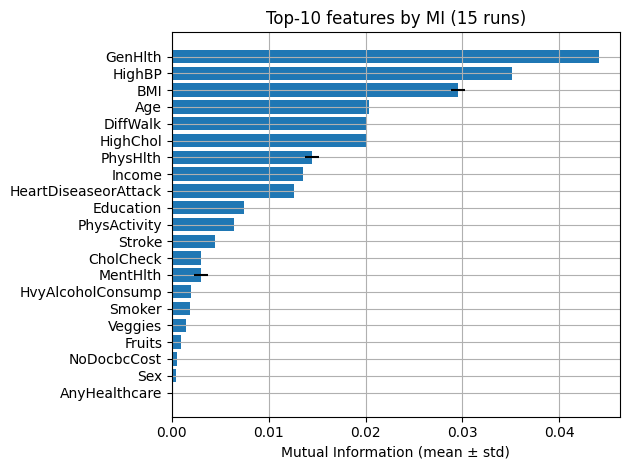

In [ ]:
top = mi_df.head(21).iloc[::-1] 

plt.figure()
plt.barh(top.index, top["MI_mean"], xerr=top["MI_std"])
plt.xlabel("Mutual Information (mean ± std)")
plt.title("Top-10 features by MI (15 runs)")
plt.grid()
plt.tight_layout()
plt.show()


### **Quels subset de features prendre ?**

Ranking top8 contient :
**GenHlth, HighBP, BMI, Age, DiffWalk, HighChol, PhysHlth, Income**, (HeartDiseaseorAttack, Education)

Alors que SelectKBest(k=8) (dans tests CV) nous sort :
**HighBP, HighChol, BMI, HeartDiseaseorAttack, PhysActivity, GenHlth, DiffWalk, Age**

=> Différences : *PhysActivity + HeartDiseaseorAttack* ont “pris la place” de *PhysHlth + Income*.

In [ ]:
scoring = {
    "f1": make_scorer(f1_score),
    "recall": make_scorer(recall_score),
    "bal_acc": make_scorer(balanced_accuracy_score)
}

def score_subset(cols):
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=3000, class_weight="balanced", solver="lbfgs"))
    ])
    res = cross_validate(pipe, X_train[cols], y_train, cv=cv, scoring=scoring, n_jobs=-1)
    return {k: float(np.mean(v)) for k, v in res.items() if k.startswith("test_")}

subset_A = ["GenHlth","HighBP","BMI","Age","DiffWalk","HighChol","PhysHlth","Income"]  # top-8 ranking stable
subset_B = ["HighBP","HighChol","BMI","HeartDiseaseorAttack","PhysActivity","GenHlth","DiffWalk","Age"]  # notre k=8

print("Subset A:", score_subset(subset_A))
print("Subset B:", score_subset(subset_B))


Subset A: {'test_f1': 0.43772209551950425, 'test_recall': 0.7625277375838188, 'test_bal_acc': 0.7419101190773434}
Subset B: {'test_f1': 0.4396984988996811, 'test_recall': 0.7618910427598063, 'test_bal_acc': 0.7430431019710991}


=> Subset B est légèrement meilleur sur les métriques globales (F1 + bal_acc), tout en gardant un recall quasi inchangé.

B a une logique “santé” plus claire :
* HeartDiseaseorAttack et PhysActivity sont des facteurs/comorbidités très cohérents cardiométaboliques,
* alors que Income / PhysHlth sont plus “proxy” (socio-éco / état physique global), parfois redondants avec GenHlth et DiffWalk.

Dc B = un peu mieux en score et plus “directement clinique/lifestyle” → meilleure histoire d’interprétabilité.

### **Conclusion :**
Après identification d’un coude autour de k=8 (rendements décroissants au-delà), nous avons comparé deux sous-ensembles plausibles de 8 variables : (A) top-8 MI sur l’ensemble d’entraînement et (B) top-8 obtenu via SelectKBest en validation croisée. Les performances étant très proches, nous retenons (B), qui présente un léger avantage en F1 et balanced accuracy, avec un rappel quasi identique, tout en restant plus interprétable.

La sélection de 8 variables conserve l’essentiel de la performance du modèle complet, ce qui suggère que l’information prédictive est concentrée dans quelques facteurs cardio-métaboliques et d’état de santé général.

**La comparaison Subset A vs Subset B sert à choisir une variante “compacte” (8 variables). Comme il s’agit d’une décision de sélection guidée par les performances en CV, les scores CV ne doivent pas être interprétés comme une performance finale. La performance finale est reportée uniquement sur le test set après avoir figé le choix (Subset B). Pour être parfaitement strict, on pourrait utiliser une nested cross-validation pour sélectionner le sous-ensemble puis estimer la perf, mais l’écart A/B est ici très faible.**

### **(Compararer avec Filter method Chi2 :)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2

ks = [3, 5, 8, 10, 15, 21]
rows = []

for k in ks:
    pipe = Pipeline([
        ("minmax", MinMaxScaler()),
        ("select", SelectKBest(score_func=chi2, k=k)),
        ("clf", LogisticRegression(max_iter=3000, class_weight="balanced", solver="lbfgs"))
    ])
    s = eval_pipe(pipe, X_train, y_train)
    rows.append({"method": "Chi2", "k": k, **s})

chi2_results = pd.DataFrame(rows)
print(chi2_results)


  method   k        f1    recall   bal_acc
0   Chi2   3  0.371689  0.767939  0.692597
1   Chi2   5  0.403886  0.691764  0.705540
2   Chi2   8  0.418748  0.750292  0.726692
3   Chi2  10  0.423987  0.746296  0.729543
4   Chi2  15  0.441795  0.762068  0.744411
5   Chi2  21  0.443012  0.765392  0.745893


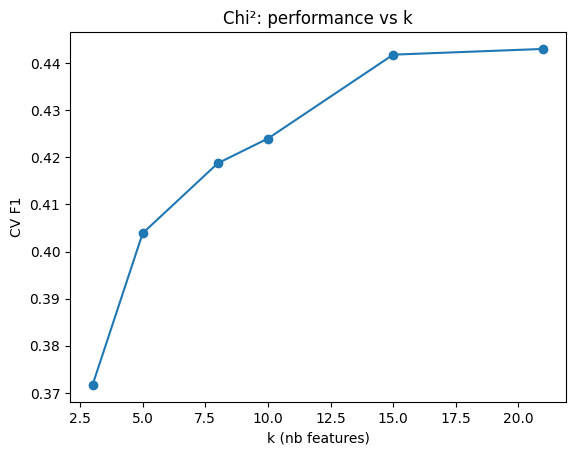

In [ ]:
plt.figure()
plt.plot(chi2_results["k"], chi2_results["f1"], marker="o")
plt.xlabel("k (nb features)")
plt.ylabel("CV F1")
plt.title("Chi²: performance vs k")
plt.show()


=> MI est mieux que Chi²

----
## **3. Embedded : Logistic ElasticNet (ou L1)**

utile pour dire : “sélection intégrée + interprétation via coefficients non nuls"

### **L1 (sparce)**

In [ ]:
Cs = np.logspace(-5, 0, 11)  # 1e-5 ... 1
thr = 1e-4                   # seuil pour considérer "coef = 0"
rows = []

for C in Cs:
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            penalty="l1", solver="saga", C=C,
            class_weight="balanced",
            max_iter=8000,
            tol=1e-3
        ))
    ])
    s = eval_pipe(pipe, X_train, y_train)

    pipe.fit(X_train, y_train)
    coefs = pipe.named_steps["clf"].coef_.ravel()
    nnz = int(np.sum(np.abs(coefs) > thr))

    rows.append({"C": C, "nb_features": nnz, **s})

l1_results2 = pd.DataFrame(rows).sort_values("C")
print(l1_results2)


           C  nb_features        f1    recall   bal_acc
0   0.000010            0  0.081532  0.333333  0.500000
1   0.000032            2  0.163064  0.666667  0.500000
2   0.000100            7  0.425811  0.745871  0.730688
3   0.000316           12  0.438069  0.762740  0.742179
4   0.001000           17  0.442895  0.765498  0.745840
5   0.003162           20  0.443190  0.765852  0.746103
6   0.010000           20  0.443167  0.765534  0.746021
7   0.031623           21  0.443123  0.765569  0.746001
8   0.100000           21  0.443175  0.765604  0.746042
9   0.316228           21  0.443030  0.765322  0.745889
10  1.000000           21  0.443072  0.765357  0.745924


|       C | #features |         F1 | Recall | BalAcc | Interprétation                                     |
| ------: | --------: | ---------: | -----: | -----: | -------------------------------------------------- |
|    1e-5 |         0 |     0.082 |    0.333 |    0.5 | **Modèle dégénéré** (prédit quasi tout en positif) → recall artificiellement haut, mais aucune capacité discriminante|
|    1e-4 |         7 |     0.4258 | 0.7459 | 0.7307 | vraie sélection, mais perte de perf                |
| 3.16e-4 |        12 |     0.4380 | 0.7627 | 0.7422 | bon compromis sparsité/perf                        |
|    1e-3 |        17 |     0.4429 | 0.7655 | 0.7458 | perf ≈ baseline, réduction modeste                 |
| 3.16e-3 |        20 | **0.4432** | 0.7659 | 0.7461 | perf max, quasi pas de réduction                   |


In [ ]:
#récupérer la liste des features pour le meilleur C :
best_C = 0.001  #
pipe_l1 = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        penalty="l1", solver="saga", C=best_C,
        class_weight="balanced", max_iter=5000
    ))
])
pipe_l1.fit(X_train, y_train)
#thr = 1e-4
coefs = pipe_l1.named_steps["clf"].coef_.ravel()
selected_features_l1 = X_train.columns[np.abs(coefs) > thr].tolist()
print(selected_features_l1)


['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


**=> L1 peut réduire, mais pour garder la perf proche du baseline, il faut rester autour de 16–20 features, donc la sélection est faible** 

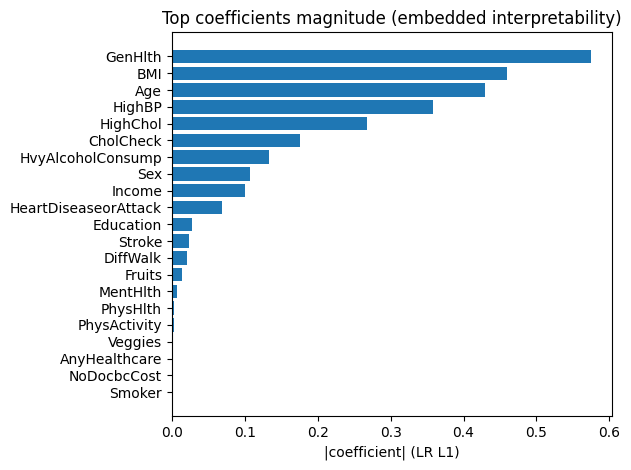

In [ ]:
best_C = 1e-3  #
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        penalty="l1", solver="saga", C=best_C,
        class_weight="balanced", max_iter=8000, tol=1e-3
    ))
])
pipe.fit(X_train, y_train)
coefs = pd.Series(pipe.named_steps["clf"].coef_.ravel(), index=X_train.columns)

coefs_abs = coefs.abs().sort_values(ascending=False).head(21)
plt.figure()
plt.barh(coefs_abs.index[::-1], coefs_abs.values[::-1])
plt.xlabel("|coefficient| (LR L1)")
plt.title("Top coefficients magnitude (embedded interpretability)")
plt.tight_layout()
plt.show()

**=> met en avant comme MI +subsetB : GenHlth, BMI, Age, HighBP, HighChol (puis CholCheck, etc.)**

***F1 vs nombre de features (avec annotations de C) :***

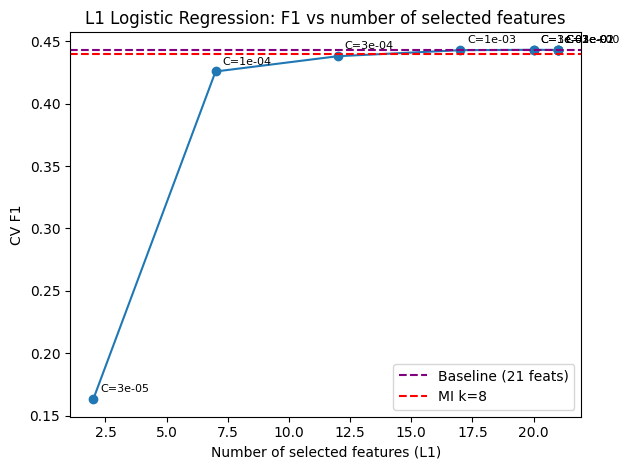

In [ ]:
df = l1_results2.copy()

# (optionnel) enlever le point dégénéré nb_features=0 si tu veux une courbe plus lisible
df_plot = df[df["nb_features"] > 0].copy()

plt.figure()
plt.plot(df_plot["nb_features"], df_plot["f1"], marker="o")
plt.xlabel("Number of selected features (L1)")
plt.ylabel("CV F1")
plt.title("L1 Logistic Regression: F1 vs number of selected features")

#annoter avec C (arrondi)
for _, r in df_plot.iterrows():
    plt.annotate(f"C={r['C']:.0e}", (r["nb_features"], r["f1"]),
                 textcoords="offset points", xytext=(5,5), fontsize=8)

# Baseline + MI (prcomparer)
baseline_f1 = 0.44303568607676186
mi8_f1 = 0.439743  # MI k=8
plt.axhline(baseline_f1, linestyle="--", label="Baseline (21 feats)", c = "purple")
plt.axhline(mi8_f1, linestyle="--", label="MI k=8", c = "red")
plt.legend()

plt.tight_layout()
plt.show()


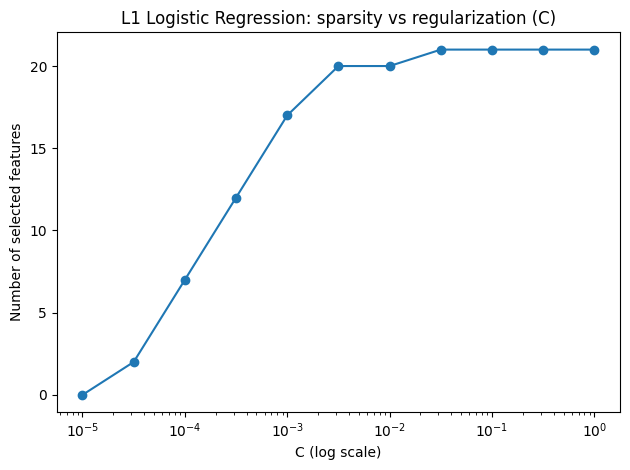

In [ ]:
plt.figure()
plt.plot(df["C"], df["nb_features"], marker="o")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Number of selected features")
plt.title("L1 Logistic Regression: sparsity vs regularization (C)")
plt.tight_layout()
plt.show()


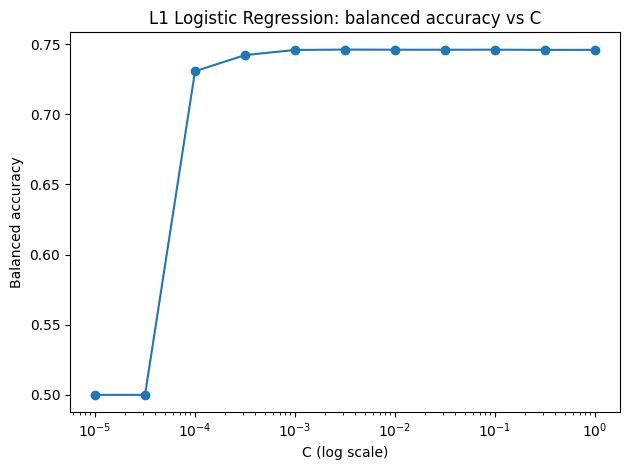

In [ ]:
plt.figure()
plt.plot(df["C"], df["bal_acc"], marker="o")
plt.xscale("log")
plt.xlabel("C (log scale)")
plt.ylabel("Balanced accuracy")
plt.title("L1 Logistic Regression: balanced accuracy vs C")
plt.tight_layout()
plt.show()


### **ElasticNet**

In [ ]:
rows = []
Cs = np.logspace(-5, -1, 9)          # plus petits
l1_ratios = [0.5, 0.7, 0.9, 0.95]    # plus proche de L1
thr = 1e-4

for C in Cs:
    for l1r in l1_ratios:
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("clf", LogisticRegression(
                penalty="elasticnet", solver="saga",
                C=C, l1_ratio=l1r,
                class_weight="balanced",
                max_iter=8000,
                tol=1e-3
            ))
        ])
        s = eval_pipe(pipe, X_train, y_train)

        pipe.fit(X_train, y_train)
        coefs = pipe.named_steps["clf"].coef_.ravel()
        nnz = int(np.sum(np.abs(coefs) > thr))

        rows.append({"C": C, "l1_ratio": l1r, "nb_features": nnz, **s})

en_results2 = pd.DataFrame(rows).sort_values(["f1","bal_acc"], ascending=False)
print(en_results2.head(15))

           C  l1_ratio  nb_features        f1    recall   bal_acc
20  0.003162      0.50           20  0.443234  0.765428  0.746039
29  0.031623      0.70           21  0.443212  0.765604  0.746065
16  0.001000      0.50           18  0.443200  0.765569  0.746047
23  0.003162      0.95           20  0.443196  0.765887  0.746115
26  0.010000      0.90           21  0.443169  0.765569  0.746030
27  0.010000      0.95           21  0.443161  0.765569  0.746024
30  0.031623      0.90           21  0.443146  0.765569  0.746016
31  0.031623      0.95           21  0.443119  0.765498  0.745983
34  0.100000      0.90           21  0.443114  0.765428  0.745965
28  0.031623      0.50           21  0.443113  0.765428  0.745965
33  0.100000      0.70           21  0.443091  0.765428  0.745951
32  0.100000      0.50           21  0.443084  0.765392  0.745939
22  0.003162      0.90           20  0.443080  0.765711  0.746003
25  0.010000      0.70           21  0.443077  0.765357  0.745927
24  0.0100

Meilleur ElasticNet :
* C = 0.001, l1_ratio = 0.5, 18 features
* F1 = 0.443214, Recall 0.765640, BalAcc 0.746071
* => il gagne presque rien vs baseline, mais il confirme :
    * performance stable,
    * légère réduction (21 → 18),
    * et souvent plus stable que L1 pur quand des features sont corrélées

#### **Conclusion embedded :**
* pr perf ≈ baseline, embedded garde beaucoup de variables (17–20)
* pr vraie réduction (8), MI est meilleur

---
## **Pipeline finale**

Évaluer sur le test set (une seule fois) :
* Baseline LR balanced / 21 features
* Approche “compacte” LR balanced / MI-8 features

Construire une approche optimale (simple mais défendable) :
* MI-8 + Logistic Regression balanced + seuil optimisé (au lieu de 0.5). Parce qu’en santé, on contrôle souvent le compromis recall / precision.

In [ ]:
#DEFINIR les DEUX JEUX DE FEATURES 

# Full set (21 features)
full_cols = X_train.columns.tolist()

# MI-8 (subset B) validé par CV chez toi
mi8_cols = [
    "HighBP", "HighChol", "BMI", "HeartDiseaseorAttack",
    "PhysActivity", "GenHlth", "DiffWalk", "Age"
]


In [ ]:
# PIPELINE "BASELINE" ET "MI-8"

pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(
        max_iter=3000,
        class_weight="balanced",
        solver="lbfgs"   # L2, stable
    ))
])


In [ ]:
#évaluer proprement sur le TEST (seuil=0.5)

from sklearn.metrics import (
    f1_score, recall_score, precision_score,
    balanced_accuracy_score, roc_auc_score,
    average_precision_score, confusion_matrix
)

def eval_test(pipe, Xtr, ytr, Xte, yte, threshold=0.5):
    pipe.fit(Xtr, ytr)
    proba = pipe.predict_proba(Xte)[:, 1]
    pred = (proba >= threshold).astype(int)

    return {
        "threshold": threshold,
        "precision": precision_score(yte, pred),
        "recall": recall_score(yte, pred),
        "f1": f1_score(yte, pred),
        "bal_acc": balanced_accuracy_score(yte, pred),
        "roc_auc": roc_auc_score(yte, proba),
        "pr_auc": average_precision_score(yte, proba),
        "cm": confusion_matrix(yte, pred)
    }

# 1) Baseline full
res_full_05 = eval_test(pipe_lr, X_train[full_cols], y_train, X_test[full_cols], y_test, threshold=0.5)

# 2) MI-8
res_mi8_05 = eval_test(pipe_lr, X_train[mi8_cols], y_train, X_test[mi8_cols], y_test, threshold=0.5)

summary_05 = pd.DataFrame([
    {"model": "LR full (21)", **{k:v for k,v in res_full_05.items() if k!="cm"}},
    {"model": "LR MI-8",      **{k:v for k,v in res_mi8_05.items() if k!="cm"}}
])

print(summary_05)
print("CM full:\n", res_full_05["cm"])
print("CM MI-8:\n", res_mi8_05["cm"])


          model  threshold  precision    recall        f1   bal_acc   roc_auc  \
0  LR full (21)        0.5   0.310749  0.761069  0.441309  0.743898  0.819631   
1       LR MI-8        0.5   0.306430  0.758382  0.436492  0.740253  0.814326   

     pr_auc  
0  0.392585  
1  0.385277  
CM full:
 [[31734 11933]
 [ 1689  5380]]
CM MI-8:
 [[31533 12134]
 [ 1708  5361]]


**=> Conclusion : MI-8 perd très peu par rapport au modèle complet (écarts faibles partout), donc c’est un excellent modèle compact/interprétable.**

In [ ]:
#optimiser le seuil (sur TRAIN uniquement) puis tester
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_val_predict

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

def find_best_threshold(pipe, Xtr, ytr):
    oof_proba = cross_val_predict(
        pipe, Xtr, ytr,
        cv=cv, method="predict_proba", n_jobs=-1
    )[:, 1]

    prec, rec, thr = precision_recall_curve(ytr, oof_proba)

    # ignorer le dernier point (pas de threshold associé)
    prec_t = prec[:-1]
    rec_t  = rec[:-1]

    f1_t = 2 * prec_t * rec_t / (prec_t + rec_t + 1e-12)
    best_idx = int(np.argmax(f1_t))
    best_thr = float(thr[best_idx])

    return best_thr, float(prec_t[best_idx]), float(rec_t[best_idx]), float(f1_t[best_idx])

best_thr_full, p_full, r_full, f1_full = find_best_threshold(pipe_lr, X_train[full_cols], y_train)
best_thr_mi8,  p_mi8,  r_mi8,  f1_mi8  = find_best_threshold(pipe_lr, X_train[mi8_cols],  y_train)

print("Best thr full:", best_thr_full, "F1(oof):", f1_full, "P:", p_full, "R:", r_full)
print("Best thr MI-8:", best_thr_mi8,  "F1(oof):", f1_mi8,  "P:", p_mi8,  "R:", r_mi8)


Best thr full: 0.6174222365974722 F1(oof): 0.46074275714517043 P: 0.3636735696161087 R: 0.6284966580613219
Best thr MI-8: 0.6249140730348954 F1(oof): 0.4561999257171521 P: 0.36501029483560105 R: 0.6081267461187537


**=> Conclusion : en augmentant le seuil, on réduit fortement les faux positifs (FP 11933 → 7805) mais on augmente les faux négatifs (FN 1689 → 2644).
Donc F1 monte (meilleur équilibre precision/recall), mais recall baisse (moins bon pour du “screening” santé).**

nb : ROC-AUC et PR-AUC ne changent pas entre thr=0.5 et thr* car ce sont des métriques basées sur les scores/probas, pas sur un seuil fixe.

In [ ]:
#Tester ces seuils optimisés sur le TEST

res_full_opt = eval_test(pipe_lr, X_train[full_cols], y_train, X_test[full_cols], y_test, threshold=best_thr_full)
res_mi8_opt  = eval_test(pipe_lr, X_train[mi8_cols],  y_train, X_test[mi8_cols],  y_test, threshold=best_thr_mi8)

summary_opt = pd.DataFrame([
    {"model": "LR full (21) + thr*", **{k:v for k,v in res_full_opt.items() if k!="cm"}},
    {"model": "LR MI-8 + thr*",      **{k:v for k,v in res_mi8_opt.items() if k!="cm"}}
])

print(summary_opt)
print("CM full opt:\n", res_full_opt["cm"])
print("CM MI-8 opt:\n", res_mi8_opt["cm"])


                 model  threshold  precision    recall        f1   bal_acc  \
0  LR full (21) + thr*   0.617422   0.361815  0.625973  0.458573  0.723617   
1       LR MI-8 + thr*   0.624914   0.361783  0.605036  0.452808  0.716126   

    roc_auc    pr_auc  
0  0.819631  0.392585  
1  0.814326  0.385277  
CM full opt:
 [[35862  7805]
 [ 2644  4425]]
CM MI-8 opt:
 [[36122  7545]
 [ 2792  4277]]


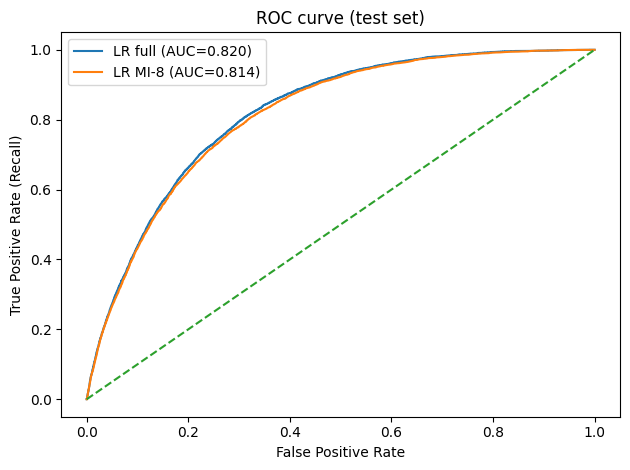

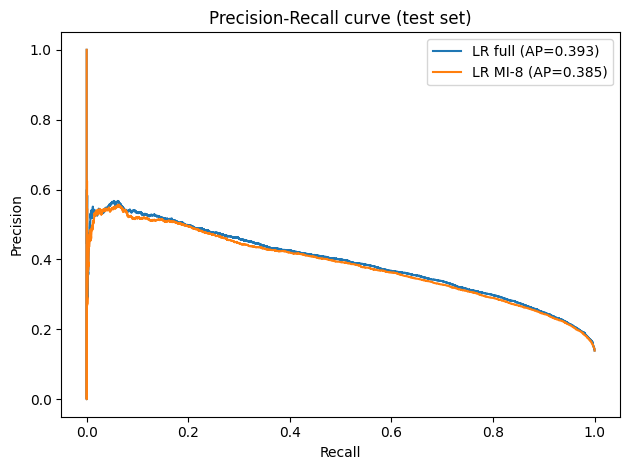

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Pipelines déjà définis chez toi: pipe_lr
# Colonnes:
full_cols = X_train.columns.tolist()
mi8_cols = ["HighBP","HighChol","BMI","HeartDiseaseorAttack","PhysActivity","GenHlth","DiffWalk","Age"]

# Fit + proba
pipe_lr.fit(X_train[full_cols], y_train)
proba_full = pipe_lr.predict_proba(X_test[full_cols])[:,1]

pipe_lr.fit(X_train[mi8_cols], y_train)
proba_mi8 = pipe_lr.predict_proba(X_test[mi8_cols])[:,1]

# ----- ROC -----
fpr_full, tpr_full, thr_full = roc_curve(y_test, proba_full)
fpr_mi8,  tpr_mi8,  thr_mi8  = roc_curve(y_test, proba_mi8)

roc_auc_full = auc(fpr_full, tpr_full)
roc_auc_mi8  = auc(fpr_mi8,  tpr_mi8)

plt.figure()
plt.plot(fpr_full, tpr_full, label=f"LR full (AUC={roc_auc_full:.3f})")
plt.plot(fpr_mi8,  tpr_mi8,  label=f"LR MI-8 (AUC={roc_auc_mi8:.3f})")
plt.plot([0,1],[0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC curve (test set)")
plt.legend()
plt.tight_layout()
plt.show()

# ----- PR -----
prec_full, rec_full, thrp_full = precision_recall_curve(y_test, proba_full)
prec_mi8,  rec_mi8,  thrp_mi8  = precision_recall_curve(y_test, proba_mi8)

ap_full = average_precision_score(y_test, proba_full)
ap_mi8  = average_precision_score(y_test, proba_mi8)

plt.figure()
plt.plot(rec_full, prec_full, label=f"LR full (AP={ap_full:.3f})")
plt.plot(rec_mi8,  prec_mi8,  label=f"LR MI-8 (AP={ap_mi8:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall curve (test set)")
plt.legend()
plt.tight_layout()
plt.show()

ROC = Les deux modèles LR (full vs MI-8) ont des performances de ranking très proches (AUC 0.820 vs 0.814), indiquant une perte marginale de discrimination après réduction à 8 variables.

PR = En contexte déséquilibré, la PR curve est plus informative : l’AP reste proche (0.393 vs 0.385), confirmant que MI-8 conserve une qualité de détection similaire.

-----
----
# **Unsupervided/visu**


“Unsupervised learning”

“Is it possible to visualise the data to explore them?”

“Do you need to reduce dimensionality?” 

PCA (visualisation / structure globale) + clustering (KMeans sur l’espace PCA) + taux de diabète par cluster.
-> Montrer si, sans supervision, on voit des profils latents (groupes) et si ces profils ont des taux de diabète différents.


### **Préparer un sous-échantillon**

Sur 253k lignes, PCA ok, mais clustering / t-SNE devient lourd → on travaille sur 10k–30k points.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# colonnes
full_cols = X_train.columns.tolist()
mi8_cols = ["HighBP","HighChol","BMI","HeartDiseaseorAttack","PhysActivity","GenHlth","DiffWalk","Age"]

def stratified_subsample(X, y, n=20000, random_state=42):
    rng = np.random.RandomState(random_state)
    idx0 = np.where(y.values == 0)[0]
    idx1 = np.where(y.values == 1)[0]
    # on garde approx les proportions d'origine
    n1 = int(n * (len(idx1) / len(y)))
    n0 = n - n1
    pick0 = rng.choice(idx0, size=min(n0, len(idx0)), replace=False)
    pick1 = rng.choice(idx1, size=min(n1, len(idx1)), replace=False)
    pick = np.concatenate([pick0, pick1])
    rng.shuffle(pick)
    return X.iloc[pick].copy(), y.iloc[pick].copy()

X_sub, y_sub = stratified_subsample(X_train[full_cols], y_train, n=20000)


### **1) PCA (full features) : variance expliquée + projection 2D**

#### ***(a) Scree plot (variance expliquée cumulée)***

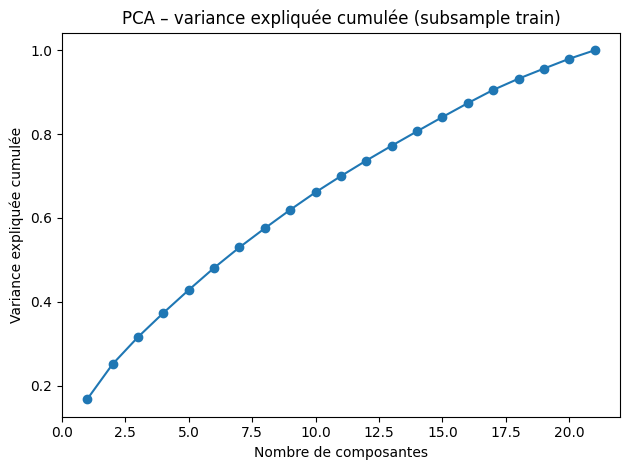

Explained variance ratio PC1-5: [0.16734231 0.08367382 0.06453609 0.05763434 0.05479533]


In [ ]:
X_scaled = StandardScaler().fit_transform(X_sub)

pca = PCA(random_state=42)
Z = pca.fit_transform(X_scaled)

cumexpl = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(range(1, len(cumexpl)+1), cumexpl, marker="o")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.title("PCA – variance expliquée cumulée (subsample train)")
plt.tight_layout()
plt.show()

print("Explained variance ratio PC1-5:", pca.explained_variance_ratio_[:5])

la variance est dispersée sur plusieurs axes. Donc il n’y a pas “une seule direction” qui résume tout : la structure est relativement complexe (normal avec des variables santé hétérogènes).

#### ***(b) Scatter PC1–PC2 (coloré par y uniquement pour interpréter)***

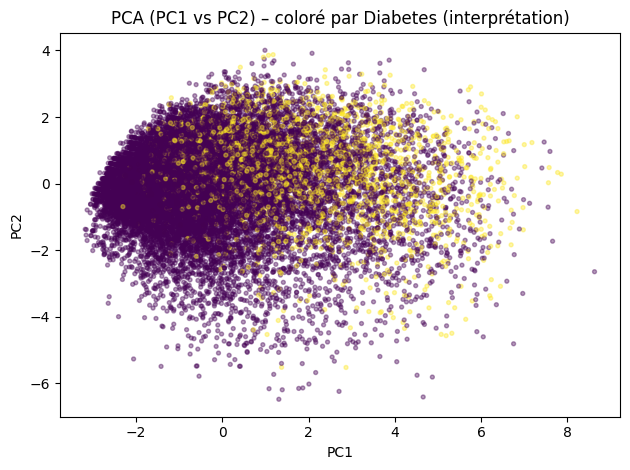

In [ ]:
plt.figure()
plt.scatter(Z[:,0], Z[:,1], s=8, alpha=0.4, c=y_sub.values)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (PC1 vs PC2) – coloré par Diabetes (interprétation)")
plt.tight_layout()
plt.show()


=> pas de séparation “propre” en 2D (les classes se recouvrent). C’est normal et ça justifie pourquoi le problème nécessite du supervisé / de bonnes features.

### **2) PCA sur MI-8 (optionnel mais très utile en slide)***

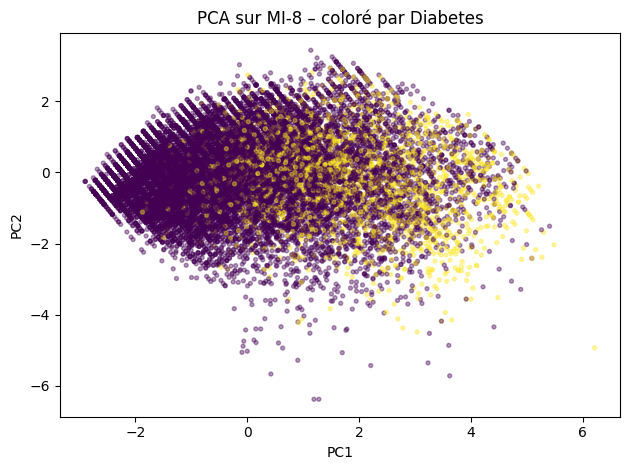

MI-8 explained variance ratio PC1-5: [0.30572107 0.15256957 0.11749486 0.10444426 0.09263948]


In [ ]:
X_sub_mi8 = X_sub[mi8_cols]
X_mi8_scaled = StandardScaler().fit_transform(X_sub_mi8)

pca8 = PCA(random_state=42)
Z8 = pca8.fit_transform(X_mi8_scaled)

plt.figure()
plt.scatter(Z8[:,0], Z8[:,1], s=8, alpha=0.4, c=y_sub.values)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA sur MI-8 – coloré par Diabetes")
plt.tight_layout()
plt.show()

print("MI-8 explained variance ratio PC1-5:", pca8.explained_variance_ratio_[:5])


Ça montre que le subset MI-8 capture déjà une structure
l’information est beaucoup plus concentrée. C’est cohérent : tes 8 variables sont plus “cohérentes” (profil cardio-métabolique + état général), donc la PCA trouve des axes dominants plus forts.

=> **Après feature selection (MI-8), la structure devient plus ‘compressible’ : PC1 explique ~31% vs 17% sur full.**

### **3) Clustering : KMeans sur l’espace PCA + taux de diabète par cluster**

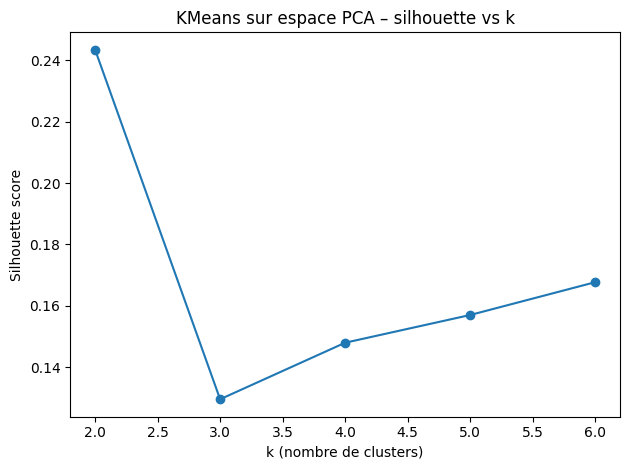

Best k (silhouette): 2
         count  diabetes_rate
cluster                      
0         5493        0.29747
1        14507        0.07941


In [ ]:
k_pcs = 10 #On clusterise sur les 10 premières composantes PCA (plus stable que sur les features brutes)
Zk = Z[:, :k_pcs]

ks = [2,3,4,5,6]
sil = []

for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(Zk)
    sil.append(silhouette_score(Zk, labels))

plt.figure()
plt.plot(ks, sil, marker="o")
plt.xlabel("k (nombre de clusters)")
plt.ylabel("Silhouette score")
plt.title("KMeans sur espace PCA – silhouette vs k")
plt.tight_layout()
plt.show()

best_k = ks[int(np.argmax(sil))]
print("Best k (silhouette):", best_k)

km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
clusters = km.fit_predict(Zk)

dfc = pd.DataFrame({"cluster": clusters, "diabetes": y_sub.values})
cluster_stats = (
    dfc.groupby("cluster")["diabetes"]
       .agg(["count","mean"])
       .rename(columns={"mean":"diabetes_rate"})
       .sort_values("diabetes_rate", ascending=False)
)
print(cluster_stats)


* Cluster 0 = ~29.7% → ≈ 2.14× plus de diabète que la moyenne
* Cluster 1 = ~7.9% → ≈ 0.57× la moyenne
même si KMeans est non supervisé, il trouve 2 profils latents dans l’espace PCA, et ces profils sont très différents en risque diabète. =>montre qu’il existe une structure liée à la santé.

=> **Sans utiliser y pour entraîner un modèle, le clustering identifie un ‘profil à risque’ : un cluster a ~30% de diabète vs ~8% pour l’autre.**

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


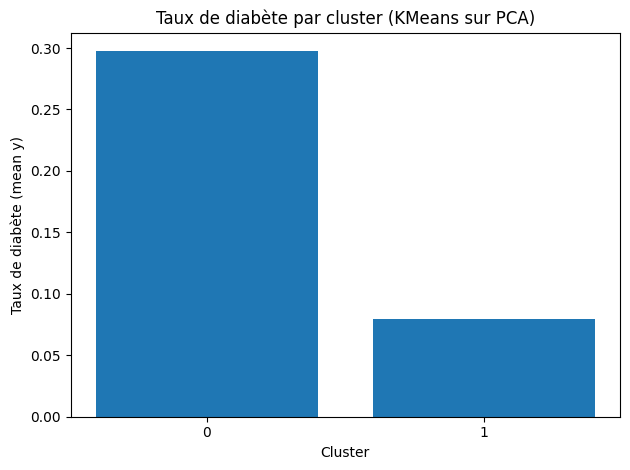

In [ ]:
rates = cluster_stats["diabetes_rate"].values
labs = cluster_stats.index.astype(str).values

plt.figure()
plt.bar(labs, rates)
plt.xlabel("Cluster")
plt.ylabel("Taux de diabète (mean y)")
plt.title("Taux de diabète par cluster (KMeans sur PCA)")
plt.tight_layout()
plt.show()

In [ ]:
#---Quels variables sont hautes/basses ds chacun des deu xcluster ?
#reprend objets : X_sub (full), y_sub, clusters
# clusters = km.fit_predict(Zk) déjà calculé

df = X_sub.copy()
df["cluster"] = clusters
df["diabetes"] = y_sub.values

# Sur MI-8 : moyennes par cluster
means_mi8 = df.groupby("cluster")[mi8_cols].mean().T
means_mi8["diff_(0-1)"] = means_mi8[0] - means_mi8[1]
means_mi8 = means_mi8.sort_values("diff_(0-1)", ascending=False)

print(means_mi8)


cluster                       0          1  diff_(0-1)
BMI                   30.857819  27.461432    3.396387
Age                    9.292372   7.552147    1.740225
GenHlth                3.556709   2.105535    1.451173
DiffWalk               0.545421   0.023506    0.521916
HighBP                 0.715820   0.316950    0.398870
HighChol               0.634262   0.345764    0.288498
HeartDiseaseorAttack   0.266157   0.034121    0.232035
PhysActivity           0.507555   0.861377   -0.353822


le cluster “à risque” a *BMI, Age, GenHlth, DiffWalk, HighBP/HighChol, HeartDisease* plus élevés et PhysActivity plus faible. -> réseau de dépendances ? (PhysActivity → BMI → HighBP/HighChol → HeartDisease → GenHlth/DiffWalk, etc.)

=> **Puisqu’il y a des profils et des variables liées entre elles, on va modéliser explicitement les dépendances via un BN.**

-----
----

PCA/KMeans a trouvé 2 profils latents :
* Cluster 0 : BMI↑, Age↑, GenHlth↑, DiffWalk↑, HighBP↑, HighChol↑, HeartDisease↑, PhysActivity↓ → taux diabète ~30%
* Cluster 1 : profil inverse → taux diabète ~8%

Un BN permet d’exprimer ce profil sous forme de dépendances probabilistes et de quantifier :
* P(diabetes=1 | HighBP=1, BMI_bin=haut, Age=haut, PhysActivity=0, …)

Markov blanket de Diabetes = variables “directement” liées dans le BN appris (bon support d’explication)

## ~ PARTIE 4: Réseau Bayésien (BN)

___________


Est-ce qu’un BN est adapté à ces données ?
Oui : beaucoup de variables sont binaires/ordinales, donc BN discret naturel.

Est-ce que BN aide à expliquer ?
Oui : structure + Markov blanket + exemples de probabilités conditionnelles.

Est-ce que BN est compétitif en prédiction ?
On compare NB-BN et BN-HC à LR (full vs MI-8). Même si BN n’est pas le meilleur, il peut être le meilleur compromis “explainability”.

In [ ]:
from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.estimators import BayesianEstimator, HillClimbSearch, BIC
from pgmpy.inference import VariableElimination

from sklearn.metrics import f1_score, recall_score, precision_score, balanced_accuracy_score, roc_auc_score, average_precision_score, confusion_matrix


## **Préparer les données (discrètes)**

Un BN “classique” attend des variables discrètes. Dans MI-8, seule BMI est continue. On la discrétise (4 bins) : qcut (quartiles) → robuste

In [ ]:
mi8_cols = ["HighBP","HighChol","BMI","HeartDiseaseorAttack","PhysActivity","GenHlth","DiffWalk","Age"]
y_col = "Diabetes_binary"

def make_bn_df(X, y, fit_bins_on=None):
    df = X[mi8_cols].copy()
    df[y_col] = y.values

    # BMI -> discretisation (quartiles)
    if fit_bins_on is None:
        # apprentissage des bins sur df lui-même
        df["BMI_bin"], bins = pd.qcut(df["BMI"], q=4, labels=False, retbins=True, duplicates="drop")
        bins = np.array(bins)
    else:
        # utiliser bins appris sur train pour transformer test
        bins = fit_bins_on
        df["BMI_bin"] = pd.cut(df["BMI"], bins=bins, labels=False, include_lowest=True)

    df = df.drop(columns=["BMI"])
    
    # tout en int
    for c in df.columns:
        df[c] = df[c].astype(int)

    return df, bins

train_bn, bmi_bins = make_bn_df(X_train, y_train, fit_bins_on=None)
test_bn,  _        = make_bn_df(X_test,  y_test,  fit_bins_on=bmi_bins)

train_bn.head(), bmi_bins


(        HighBP  HighChol  HeartDiseaseorAttack  PhysActivity  GenHlth  \
 153147       0         0                     0             1        2   
 176137       1         0                     0             1        2   
 175578       1         1                     0             1        1   
 177887       1         1                     0             0        4   
 182143       0         1                     0             1        5   
 
         DiffWalk  Age  Diabetes_binary  BMI_bin  
 153147         0    2                0        2  
 176137         0   13                0        0  
 175578         0    9                0        2  
 177887         0    7                0        3  
 182143         1    7                0        0  ,
 array([12., 24., 27., 31., 98.]))

## **BN 1 : Naive Bayes (baseline BN)**

Structure imposée : Diabetes_binary -> chaque feature.
Hypothèse : features conditionnellement indépendantes sachant y. C’est faux dans la vraie vie, mais ça marche souvent étonnamment bien et c’est ultra simple.

In [ ]:
features_bn = [c for c in train_bn.columns if c != y_col]

edges_nb = [(y_col, f) for f in features_bn]
bn_nb = DiscreteBayesianNetwork(edges_nb)

bn_nb.fit(train_bn, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=5)

bn_nb.check_model()


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HighBP': 'N', 'HighChol': 'N', 'HeartDiseaseorAttack': 'N', 'PhysActivity': 'N', 'GenHlth': 'N', 'DiffWalk': 'N', 'Age': 'N', 'Diabetes_binary': 'N', 'BMI_bin': 'N'}


True

In [ ]:
##Prédire des probabilités P(y=1 | x)
infer_nb = VariableElimination(bn_nb)

def predict_proba_bn(infer, df, y_col="Diabetes_binary"):
    proba = np.zeros(len(df))
    for i, row in enumerate(df.to_dict(orient="records")):
        ev = {k: v for k, v in row.items() if k != y_col}
        q = infer.query(variables=[y_col], evidence=ev, show_progress=False)
        # valeurs dans l'ordre des états 0,1
        proba[i] = q.values[1]
    return proba

proba_nb = predict_proba_bn(infer_nb, test_bn, y_col=y_col)


In [ ]:
def eval_from_proba(y_true, proba, thr=0.5):
    pred = (proba >= thr).astype(int)
    return {
        "precision": precision_score(y_true, pred),
        "recall": recall_score(y_true, pred),
        "f1": f1_score(y_true, pred),
        "bal_acc": balanced_accuracy_score(y_true, pred),
        "roc_auc": roc_auc_score(y_true, proba),
        "pr_auc": average_precision_score(y_true, proba),
        "cm": confusion_matrix(y_true, pred)
    }

res_nb = eval_from_proba(y_test.values, proba_nb, thr=0.5)
res_nb


{'precision': 0.40216588727541225,
 'recall': 0.46230018390154193,
 'f1': 0.4301414939124712,
 'bal_acc': np.float64(0.6755245623746609),
 'roc_auc': np.float64(0.811214482354225),
 'pr_auc': np.float64(0.38922084820687636),
 'cm': array([[38809,  4858],
        [ 3801,  3268]])}

BN Naive Bayes = baseline BN, rapide, interprétation directe via CPDs

**=> Conclusion BN1 :**
* **Modèles comparés :**
    * **LR full (21) : F1 0.441, Recall 0.761, Precision 0.311, ROC-AUC 0.820, PR-AUC 0.393**
    * **LR MI-8 : F1 0.436, Recall 0.758, Precision 0.306, ROC-AUC 0.814, PR-AUC 0.385**
* **BN Naive Bayes (MI-8 + BMI discretisé) : F1 0.430, Recall 0.462, Precision 0.402, ROC-AUC 0.811, PR-AUC 0.389**

***-> BN NB a une AUC proche de LR mais opère à un point plus “précis / moins sensible” (precision↑, recall↓).***

## **BN 2 : Apprentissage de structure (Hill-Climbing)**

Ici, le BN apprend un graphe qui explique les dépendances entre variables, et on peux analyser le Markov blanket de Diabetes_binary (les variables les plus “directement” liées dans le graphe)

In [ ]:
##learn la structure sur un sous-échantillon (sinon ça peut être long)

# sous-échantillon train pour structure learning
train_bn_sub = train_bn.sample(n=15000, random_state=42)

hc = HillClimbSearch(train_bn_sub)
best_model = hc.estimate(scoring_method=BIC(train_bn_sub))

best_model.edges()

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HighBP': 'N', 'HighChol': 'N', 'HeartDiseaseorAttack': 'N', 'PhysActivity': 'N', 'GenHlth': 'N', 'DiffWalk': 'N', 'Age': 'N', 'Diabetes_binary': 'N', 'BMI_bin': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HighBP': 'N', 'HighChol': 'N', 'HeartDiseaseorAttack': 'N', 'PhysActivity': 'N', 'GenHlth': 'N', 'DiffWalk': 'N', 'Age': 'N', 'Diabetes_binary': 'N', 'BMI_bin': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HighBP': 'N', 'HighChol': 'N', 'HeartDiseaseorAttack': 'N', 'PhysActivity': 'N', 'GenHlth': 'N', 'DiffWalk': 'N', 'Age': 'N', 'Diabetes_binary': 'N', 'BMI_bin': 'N'}


  0%|          | 0/1000000 [00:00<?, ?it/s]

OutEdgeView([('HighBP', 'Age'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'DiffWalk'), ('HeartDiseaseorAttack', 'Age'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'HighBP'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'HeartDiseaseorAttack'), ('DiffWalk', 'PhysActivity'), ('Age', 'HighChol'), ('Diabetes_binary', 'HighBP'), ('BMI_bin', 'GenHlth'), ('BMI_bin', 'Diabetes_binary'), ('BMI_bin', 'HighBP')])

In [ ]:
##Construire le BN, fitter les CPDs

bn_hc = DiscreteBayesianNetwork(best_model.edges())
bn_hc.fit(train_bn_sub, estimator=BayesianEstimator, prior_type="BDeu", equivalent_sample_size=5)

bn_hc.check_model()

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HighBP': 'N', 'HighChol': 'N', 'HeartDiseaseorAttack': 'N', 'PhysActivity': 'N', 'GenHlth': 'N', 'DiffWalk': 'N', 'Age': 'N', 'Diabetes_binary': 'N', 'BMI_bin': 'N'}


True

In [ ]:
print(bn_hc.edges())

[('HighBP', 'Age'), ('HighBP', 'HighChol'), ('HighBP', 'HeartDiseaseorAttack'), ('HighBP', 'DiffWalk'), ('Age', 'HighChol'), ('HeartDiseaseorAttack', 'Age'), ('DiffWalk', 'PhysActivity'), ('GenHlth', 'DiffWalk'), ('GenHlth', 'HighBP'), ('GenHlth', 'Diabetes_binary'), ('GenHlth', 'PhysActivity'), ('GenHlth', 'HeartDiseaseorAttack'), ('Diabetes_binary', 'HighBP'), ('BMI_bin', 'GenHlth'), ('BMI_bin', 'Diabetes_binary'), ('BMI_bin', 'HighBP')]


In [ ]:
##interpréter : Markov blanket de Diabetes

mb = bn_hc.get_markov_blanket(y_col)
mb

['HighBP', 'GenHlth', 'BMI_bin']

Le Markov blanket correspond à l’ensemble minimal de variables qui rend le reste indépendant de la cible.
=> dans la structure apprise, l’ensemble minimal de variables “directement informatives” autour du diabète est : 
* GenHlth (santé générale) = parent direct de Diabetes
* HighBP (HTA) = enfant direct de Diabetes (dans le sens du graphe appris)
* BMI_bin est aussi “au contact direct” de la cible dans la structure apprise (cf. edges)

=> Selon le BN appris (BIC), la variable la plus centrale expliquant le diabète est l’état de santé général (GenHlth), et l’HTA (HighBP) appartient au Markov blanket, ce qui en fait un co-indicateur majeur.

In [ ]:
##evaluer en classifcation (comme NB)

infer_hc = VariableElimination(bn_hc)
proba_hc = predict_proba_bn(infer_hc, test_bn, y_col=y_col)
res_hc = eval_from_proba(y_test.values, proba_hc, thr=0.5)
res_hc

{'precision': 0.547550432276657,
 'recall': 0.0537558353373886,
 'f1': 0.09790029627721242,
 'bal_acc': np.float64(0.5232825252671096),
 'roc_auc': np.float64(0.7918928469637507),
 'pr_auc': np.float64(0.358453711865519),
 'cm': array([[43353,   314],
        [ 6689,   380]])}

In [ ]:
##pq on a 0 partout juste avant ?

proba_hc = proba_hc  #probas déjà calculées
print("min/max:", proba_hc.min(), proba_hc.max())
print("quantiles:", np.quantile(proba_hc, [0.5, 0.8, 0.9, 0.95, 0.99]))


min/max: 0.005890926758168347 0.5820385332504661
quantiles: [0.08819492 0.26772565 0.32369146 0.4001387  0.58203853]


-> max ≈ 0.58, dc souvent < 0.5, donc seuil 0.5 trop strict, dc n'a pas souvent P(Diabetes=1|x) ≥ 0.5

**Le BN structure-learned produit souvent des probabilités systématiquement < 0.5, donc le seuil 0.5 est inadapté sur données déséquilibrées. Nous optimisons le seuil sur un sous-ensemble de validation**

## **Visu des graphs**

/var/folders/f9/bjgrl6xd45v_c41105jm3ft40000gn/T/ipykernel_1466/2058997693.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


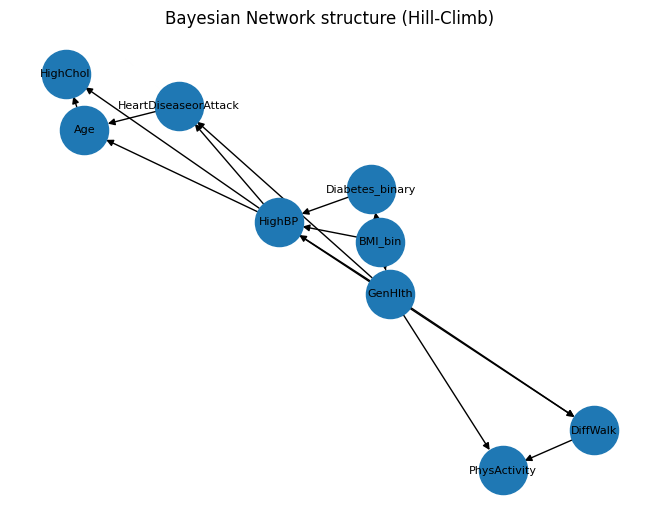

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_edges_from(bn_hc.edges())

plt.figure()
nx.draw(G, with_labels=True, node_size=1200, font_size=8, arrows=True)
plt.title("Bayesian Network structure (Hill-Climb)")
plt.tight_layout()
plt.show()


graphe très interprétable, avec GenHlth comme hub.

**direction ≠ causalité** ici. En structure learning purement statistique (BIC), les directions peuvent refléter des équivalences de Markov, pas un mécanisme médical.

**=> Conclusion HC+BIC :**
* **Markov blanket(Diabetes) = {GenHlth, HighBP, BMI_bin}**
* **Graphe appris : GenHlth relie Diabetes, BMI_bin, PhysActivity, HeartDisease, DiffWalk, HighBP…**
* **En classification au seuil 0.5 : modèle trop conservateur (prévoit tout 0) → nécessite threshold tuning**
* **But principal : fournir une structure de dépendances cohérente avec les profils observés en clustering (BMI↑, Age↑, GenHlth↑, DiffWalk↑, PhysActivity↓ → risque ↑).**

In [ ]:
##seuil optimisé F1 sur train/val puis test
##trehsol tuning

# 1) échantillon validation depuis train
val_df = train_bn.sample(n=5000, random_state=42)
y_val = val_df["Diabetes_binary"].values

infer_hc = VariableElimination(bn_hc)
proba_val = predict_proba_bn(infer_hc, val_df, y_col="Diabetes_binary")

prec, rec, thr = precision_recall_curve(y_val, proba_val)
f1_thr = 2 * prec[:-1] * rec[:-1] / (prec[:-1] + rec[:-1] + 1e-12)
best_idx = np.argmax(f1_thr)
best_thr = thr[best_idx]
print("best_thr:", best_thr)
print("best_f1:", f1_thr[best_idx], "P:", prec[best_idx], "R:", rec[best_idx])

# 2) test avec best_thr
res_hc_tuned = eval_from_proba(y_test.values, proba_hc, thr=best_thr)
res_hc_tuned, res_hc_tuned["cm"]

best_thr: 0.2240689827543114
best_f1: 0.432668935342285 P: 0.326485693323551 R: 0.6412103746397695


({'precision': 0.32273228057289755,
  'recall': 0.6215872117696987,
  'f1': 0.4248694643202475,
  'bal_acc': np.float64(0.7052104423975477),
  'roc_auc': np.float64(0.7918928469637507),
  'pr_auc': np.float64(0.358453711865519),
  'cm': array([[34446,  9221],
         [ 2675,  4394]])},
 array([[34446,  9221],
        [ 2675,  4394]]))

-> 0.224 correspond exactement à 80e percentile des probas (quantile 0.8 = 0.258…). Donc en gros, on classes “positif” les ~20% d’individus les plus à risque selon le BN — ce qui maximise F1 dans l'échantillon

=> **Le modèle sait classer (AUC>0.5) mais il faut choisir un seuil adapté au déséquilibre / à l’objectif**

=> **Le BN structure-learned est surtout utile pour l’explicabilité (réseau + Markov blanket) ; pour en faire un classifieur, il faut ajuster le seuil en dataset déséquilibré**

#### => ***Conclusion générale BN :*** 
**Les réseaux bayésiens sont surtout utiles ici pour expliquer la structure de dépendances entre variables (graph + Markov blanket), plus que pour battre Logistic Regression en performance. Le BN Naive Bayes atteint des AUC proches de LR (ranking correct), mais opère avec un compromis precision/recall différent. Le BN appris par Hill-Climbing + BIC fournit un graphe interprétable où GenHlth est central et le Markov blanket de Diabetes_binary est {GenHlth, HighBP, BMI_bin} ; en classification, il nécessite toutefois un seuil adapté car les probabilités prédites restent < 0.5 (max ≈ 0.44). Après optimisation du seuil sur validation (thr*=0.258), on récupère une détection correcte (Recall ≈ 0.61) mais une F1 inférieure à LR, ce qui confirme que l’intérêt principal du BN est l’interprétabilité/explication plutôt que la meilleure performance.**

---
---
***=> Conclusion Feature selection + seuil + BN.***
* **Une régression logistique pondérée (class_weight="balanced") fournit une baseline stable sur un dataset déséquilibré (F1≈0.443, recall≈0.765, bal_acc≈0.746).**

* **La sélection par Mutual Information met en évidence que l’information prédictive est concentrée dans un petit noyau de facteurs cardio-métaboliques et d’état de santé général (GenHlth, HighBP, BMI, Age, DiffWalk, HighChol…), et qu’un modèle réduit à 8 variables conserve presque toute la performance du modèle complet, ce qui améliore l’interprétabilité.**
* **Enfin, l’optimisation de seuil montre que le choix 0.5 est arbitraire et dépend du compromis precision/recall : augmenter le seuil réduit les faux positifs mais dégrade le recall (moins adapté à un usage “screening”).** 

* L**es réseaux bayésiens complètent l’analyse : BN-Naive Bayes est compétitif en ranking (AUC proche LR) mais avec un compromis precision/recall différent, tandis que le BN appris par HillClimb+BIC est surtout utile pour l’explicabilité (structure + Markov blanket), et nécessite un seuil adapté (probas < 0.5) pour produire une classification non dégénérée.**